In [1]:
import numpy as np
import csv
from textblob import TextBlob
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
%matplotlib inline

# Next we import the dataframe containing all the comments on New York Times articles published in April 2018
curr_dir = r'D:\Python\MachineLearning\nyt-comments'
comments = pd.read_csv(curr_dir + '\CommentsApril2018.csv')
articles = pd.read_csv(curr_dir + '\ArticlesApril2018.csv')

# We write the two functions that are used often:
def print_largest_values(s, n=5):
    s = sorted(s.unique())
    for v in s[-1:-(n+1):-1]:
        print(v)
    print()

def print_smallest_values(s, n=5):
    s = sorted(s.unique())
    for v in s[:n]:
        print(v)
    print()


In [2]:
comments.sample(5)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
178528,1524152132,5ad7b462068401528a2a971f,910.0,"“It’s a total win,” Mr. Stris said in an inter...",26796295.0,26796295.0,<br/>,comment,1524152061,1.0,...,approved,1,0,News,1524152132,The Iconoclast,37105403.0,Oregon,NaN,NaN
259383,1525203998,5ae79ecd068401528a2ab893,894.0,I know the writer (Krugman) does not like Trum...,26937202.0,26937202.0,<br/>,comment,1525202780,1.0,...,approved,1,0,Op-Ed,1525203998,Charles,58148361.0,Centennial,NaN,NaN
202330,1523892450,5ad470ae068401528a2a8e1f,1836.0,I'm white and I am categorically NOT offended ...,26751638.0,26751638.0,<br/>,comment,1523883146,1.0,...,approved,1,0,Op-Ed,1523892450,ROK,58117336.0,Minneapolis,NaN,NaN
55918,1523672066,5ad0f4a4068401528a2a8949,906.0,"Look, a squirrel!!",26730879.0,26730879.0,<br/>,comment,1523662093,1.0,...,approved,1,0,News,1523672066,LS,38260290.0,Maine,NaN,NaN
112052,1523203720,5ac90e31068401528a2a4945,953.0,What child of the 60’s could ever forget the s...,26638159.0,26638159.0,<br/>,comment,1523150723,1.0,...,approved,1,0,Op-Ed,1523203720,Kathy,50213728.0,NY,NaN,NaN


In [3]:
comments.shape

(264924, 34)

In [4]:
#Information about the columns' names, datatypes and null values
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 34 columns):
approveDate              264924 non-null int64
articleID                264924 non-null object
articleWordCount         264924 non-null float64
commentBody              264924 non-null object
commentID                264924 non-null float64
commentSequence          264924 non-null float64
commentTitle             264911 non-null object
commentType              264924 non-null object
createDate               264924 non-null int64
depth                    264924 non-null float64
editorsSelection         264924 non-null bool
inReplyTo                264924 non-null float64
newDesk                  264924 non-null object
parentID                 264924 non-null float64
parentUserDisplayName    83875 non-null object
permID                   264904 non-null object
picURL                   264924 non-null object
printPage                264924 non-null float64
recommendations        

In [5]:
#The text of a random comment in the dataframe:
comments.commentBody.sample()

209632    Not sure what the problem is here. Just like C...
Name: commentBody, dtype: object

In [6]:
#We preprocess the text of the comments to remove certain irrelevant characters.
def preprocess(commentBody):
    commentBody = commentBody.str.replace("(<br/>)", "")
    commentBody = commentBody.str.replace('(<a).*(>).*(</a>)', '')
    commentBody = commentBody.str.replace('(&amp)', '')
    commentBody = commentBody.str.replace('(&gt)', '')
    commentBody = commentBody.str.replace('(&lt)', '')
    commentBody = commentBody.str.replace('(\xa0)', ' ')  
    return commentBody
comments.commentBody = preprocess(comments.commentBody)

In [7]:
comments.commentTitle.value_counts()


<br/>    264911
Name: commentTitle, dtype: int64

In [8]:
comments.drop(the, axis=1, inplace=True)
#We drop commentTitle along with the columns that contain only null values, as seen by the info() function above.

In [9]:
#We first get the statistical summary for the categorical or string variables:

describe = comments.describe(include=['O']).transpose()
table = ff.create_table(describe, index=True, index_title='Categorical columns')
iplot(table)

In [10]:
comments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
approveDate,264924.0,1.523844e+09,7.815543e+05,1.522344e+09,1.523278e+09,1.523882e+09,1.524516e+09,1.525233e+09
articleWordCount,264924.0,1.358169e+03,9.021956e+02,5.300000e+01,9.040000e+02,1.208000e+03,1.472000e+03,9.887000e+03
commentID,264924.0,2.674474e+07,1.144032e+05,2.653117e+07,2.664844e+07,2.674923e+07,2.684227e+07,2.694126e+07
commentSequence,264924.0,2.674474e+07,1.144032e+05,2.653117e+07,2.664844e+07,2.674923e+07,2.684227e+07,2.694126e+07
createDate,264924.0,1.523837e+09,7.819454e+05,1.522344e+09,1.523249e+09,1.523852e+09,1.524515e+09,1.525233e+09
depth,264924.0,1.338561e+00,5.185143e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
inReplyTo,264924.0,8.470858e+06,1.244170e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.662660e+07,2.694099e+07
parentID,264924.0,8.470858e+06,1.244170e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.662660e+07,2.694099e+07
printPage,264924.0,8.187299e+00,1.043908e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,1.090000e+02
recommendations,264924.0,1.859889e+01,8.999093e+01,0.000000e+00,1.000000e+00,4.000000e+00,1.200000e+01,8.713000e+03


In [11]:
comments.isnull().sum()

approveDate                   0
articleID                     0
articleWordCount              0
commentBody                   0
commentID                     0
commentSequence               0
commentType                   0
createDate                    0
depth                         0
editorsSelection              0
inReplyTo                     0
newDesk                       0
parentID                      0
parentUserDisplayName    181049
permID                       20
picURL                        0
printPage                     0
recommendations               0
replyCount                    0
sectionName                   0
sharing                       0
status                        0
timespeople                   0
trusted                       0
typeOfMaterial                0
updateDate                    0
userDisplayName             100
userID                        0
userLocation                138
userTitle                264824
dtype: int64

In [12]:
comments['sentiment'] = comments.commentBody.map(lambda text: TextBlob(text).sentiment.polarity)

In [13]:
print("5 random comments with highest positive sentiment polarity: \n")
cL = comments.loc[comments.sentiment==1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with highest positive sentiment polarity: 

But please, the best books, and movie. on this sort of thing has already been made.  Could Hollywood take an oath not to make this into a screen version.  Never in my life have I felt that the United States leadership has nothing to do with what I believed in all my life, until Trump.

Not a Nobel, but perhaps an Emmy -- best performer in a comedy series.

Reply to astat about the suggestion of Bezos buying Fox News:  what a great idea!

“We couldn’t have done this without your exquisite presidential leadership.” — Paul Ryan

LOL Dan!



In [14]:
print("5 random comments with most negative sentiment polarity: \n")
cL = comments.loc[comments.sentiment==-1, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with most negative sentiment polarity: 

Sounds an awful lot like Wag The Dog.

The article says it was, at the time it occurred,  the worst terrorist attack since 9/11. Las Vagas hadn't happened yet.Can you say reading comprehension? 

It was nasty. 

Disgusting and, I hope, grounds for disbarment. 

No one is hysterical.



In [15]:
print("5 random comments with zero sentiment polarity: \n")
cL = comments.loc[comments.sentiment==0, ['commentBody']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random comments with zero sentiment polarity: 

One is tempted to praise #41 or #43 when compared to #45.One is tempted to drink poison when dehydrated.

Hi Cheeseman,We do, and Caitlin Lovinger’s column ion the Variety puzzle runs on Saturdays at noon. 

Moving from one state to another and pulling the kids out of school to 'homeschool" after abuse allegations.  Turpins  used the same playbook. 

We know nothing leaks from the Mueller team.  We know the WH leaks daily and  is underhanded.  So, what makes you think Mueller released anything?  This has Rudi Giuliani written all over them.

Wait, the NYT told me that Trump was going to start a war. 



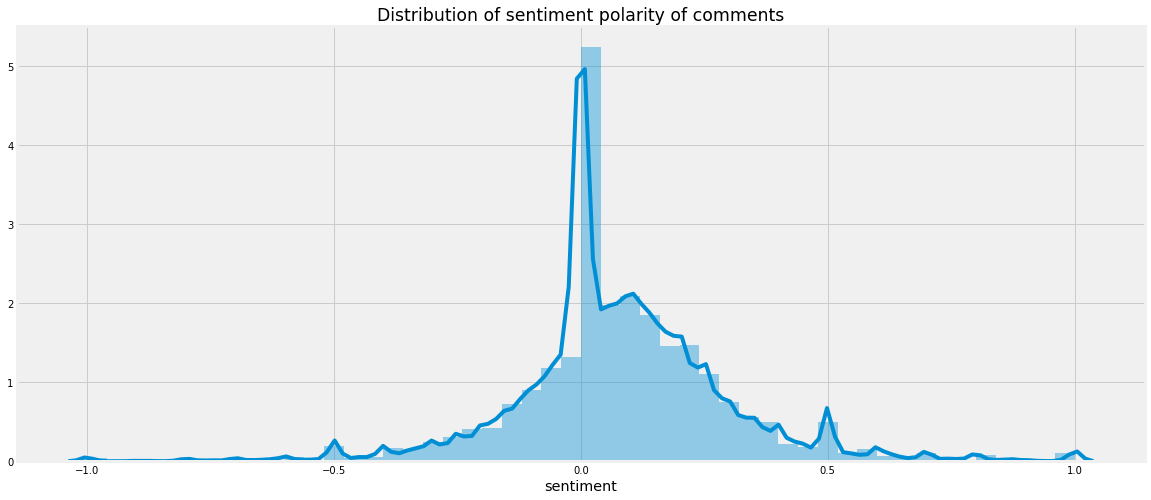

In [16]:
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(comments.sentiment);
plt.title("Distribution of sentiment polarity of comments");

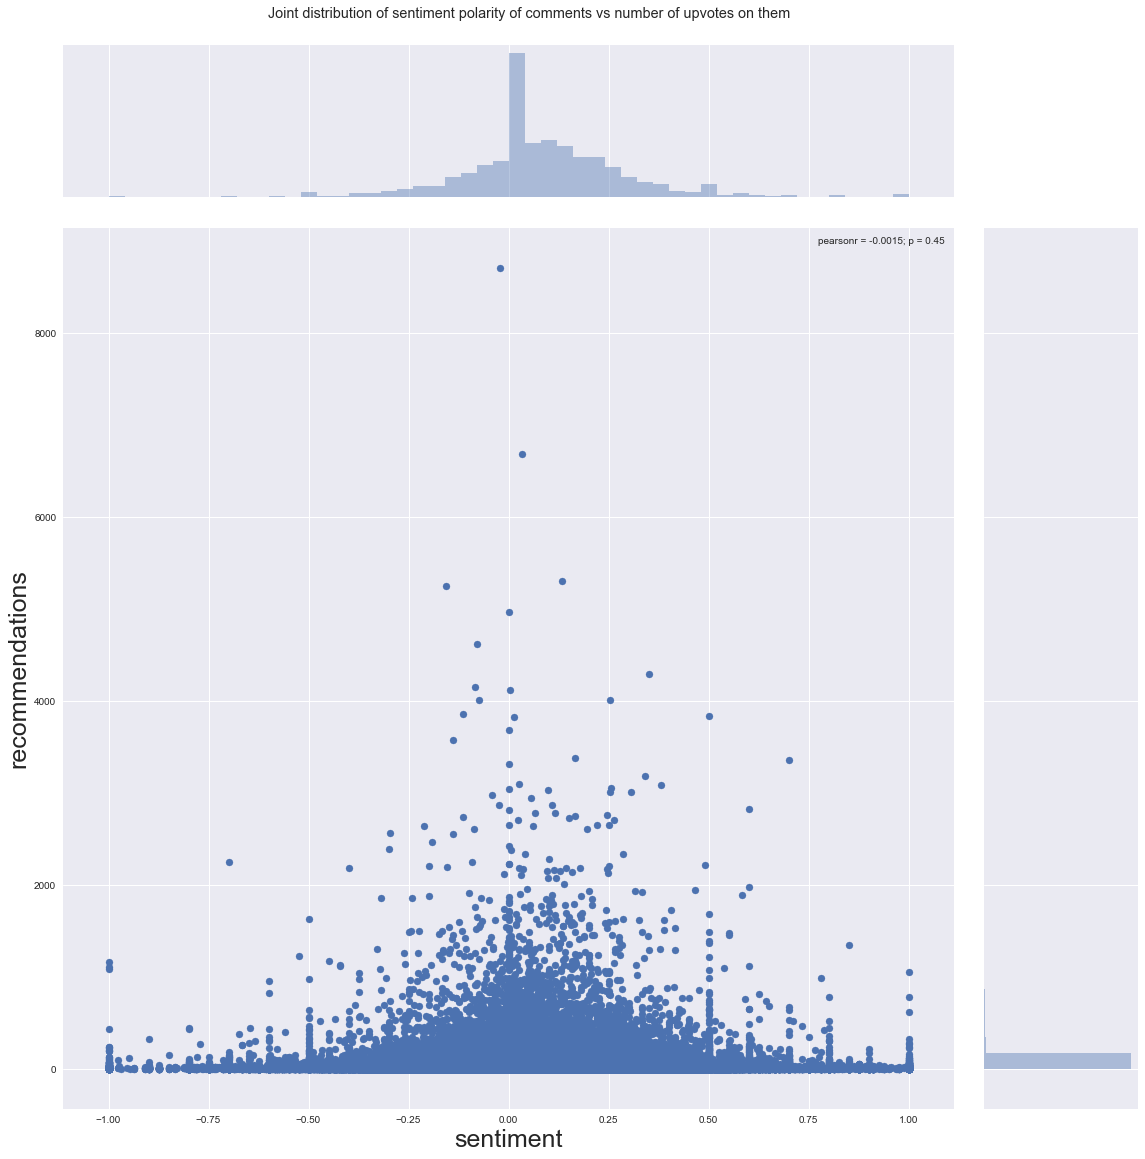

In [17]:
sns.set(rc={'axes.labelsize':25})
grid = sns.jointplot('sentiment', 'recommendations', data=comments)
grid.fig.set_figwidth(18)
grid.fig.set_figheight(18)
grid.fig.subplots_adjust(top=0.95)
grid.fig.suptitle("Joint distribution of sentiment polarity of comments vs number of upvotes on them");

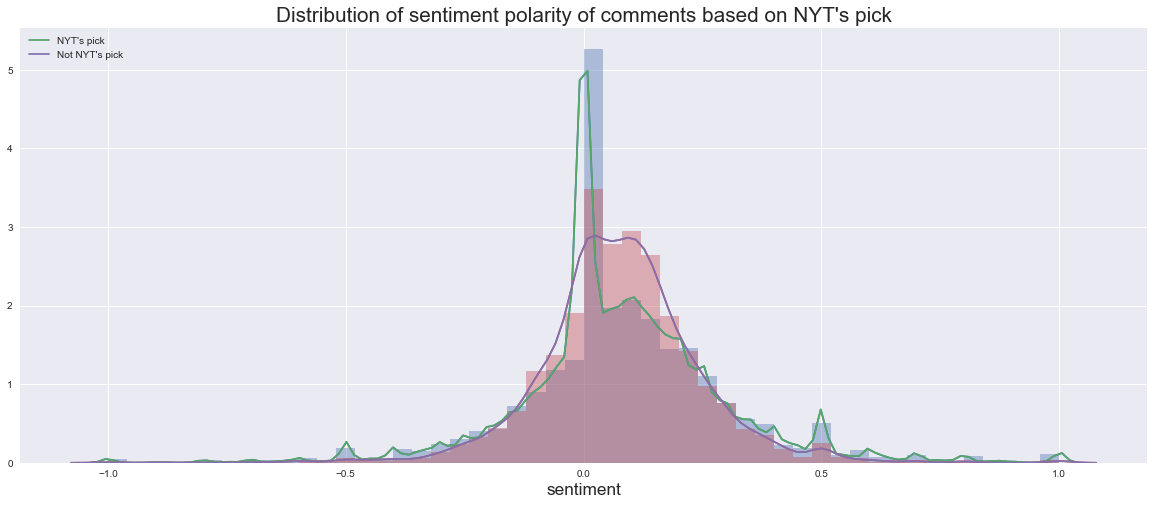

In [18]:
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(comments.loc[comments.editorsSelection==0, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.editorsSelection==0, 'sentiment'], ax=ax, label = "NYT's pick");
sns.distplot(comments.loc[comments.editorsSelection==1, 'sentiment'], ax=ax);
sns.kdeplot(comments.loc[comments.editorsSelection==1, 'sentiment'], ax=ax, label = "Not NYT's pick");
plt.title("Distribution of sentiment polarity of comments based on NYT's pick");
ax.legend(loc='upper left');

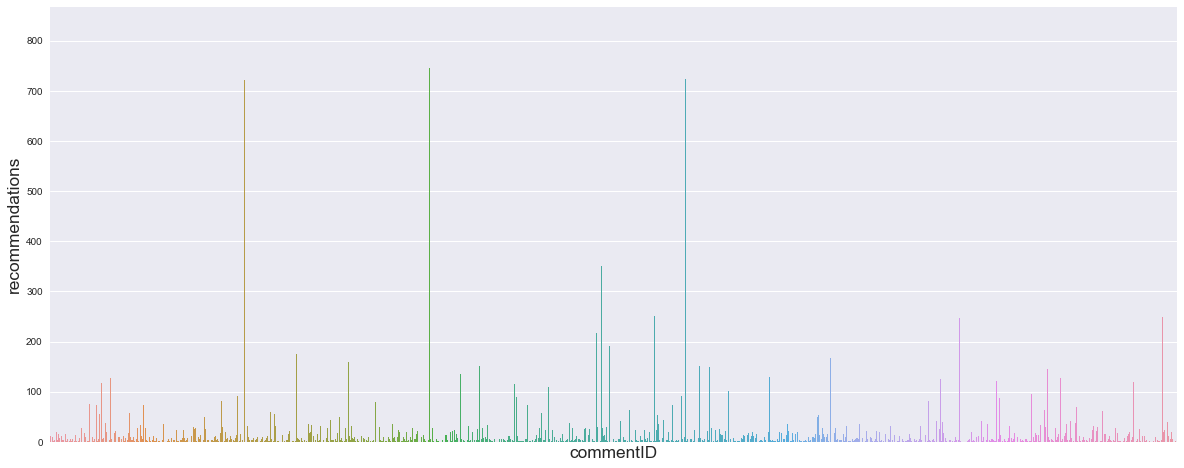

In [19]:
mpl.rcParams['figure.figsize'] = (18, 8)
sns.barplot(x='commentID', y='recommendations', data=comments.sample(2000)); 
plt.xticks([]);


In [20]:
print("Top 5 highest number of on comments: ")
print_largest_values(comments.recommendations)

Top 5 highest number of on comments: 
8713
6689
5309
5253
4972



In [21]:
comments.recommendations.quantile(0.99), comments.recommendations.quantile(0.95)
#We plot the quantiles for the number of upvotes after discarding the 100th quantile.

(283.0, 58.0)

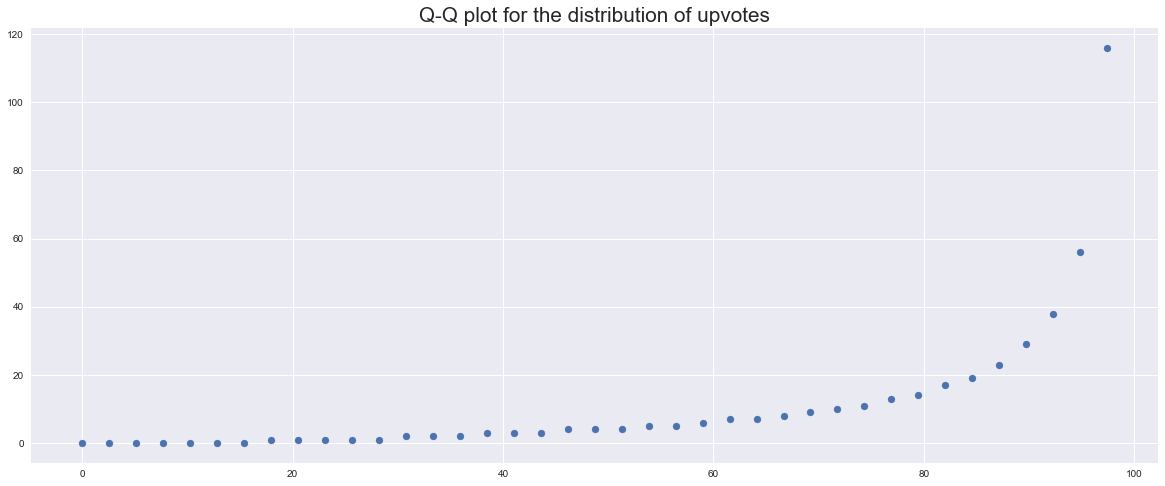

In [22]:
percs = np.linspace(0,100,40)
qn = np.percentile(comments.recommendations, percs)
plt.scatter(percs[:-1], qn[:-1]);
plt.title('Q-Q plot for the distribution of upvotes');

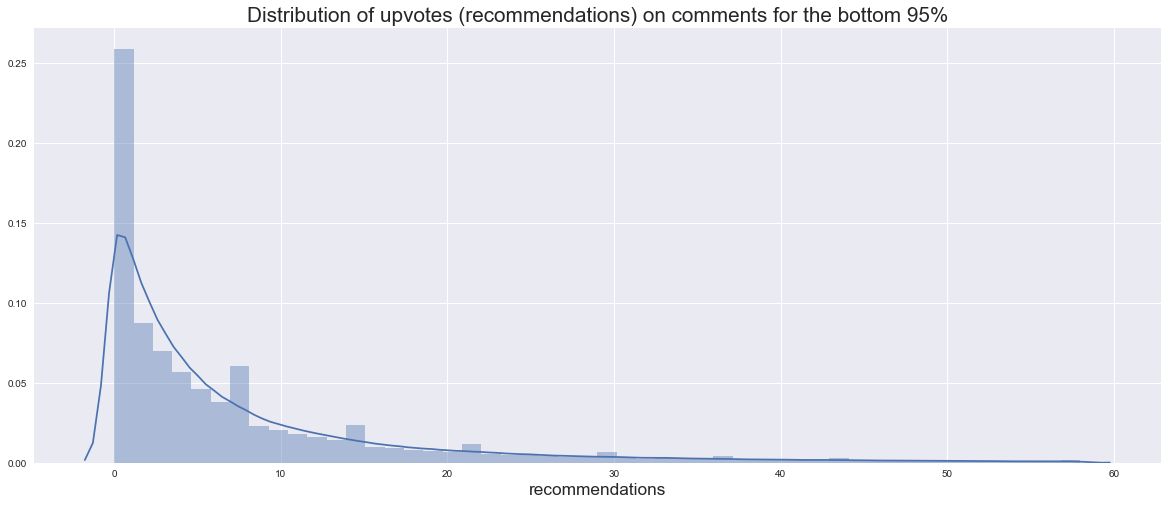

In [23]:
sns.distplot(comments.loc[comments.recommendations<=comments.recommendations.quantile(0.95), 'recommendations']);
plt.title("Distribution of upvotes (recommendations) on comments for the bottom 95%");
#Keeping outliers in our dataframe will give misleading averages for the exploratory data analysis.
#So here we first discard them by restricting the number of upvotes to 2500

In [24]:
comments[comments.recommendations > 2500].shape[0]

50

In [25]:
comments = comments[comments.recommendations <= 2500]

In [26]:
articles.head()


,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [27]:
articles.info()
#Some of the features in the comments' dataframe are shared with the articles' dataframe:(IMPORTANT)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 15 columns):
articleID           1324 non-null object
articleWordCount    1324 non-null int64
byline              1324 non-null object
documentType        1324 non-null object
headline            1324 non-null object
keywords            1324 non-null object
multimedia          1324 non-null int64
newDesk             1324 non-null object
printPage           1324 non-null int64
pubDate             1324 non-null object
sectionName         1324 non-null object
snippet             1324 non-null object
source              1324 non-null object
typeOfMaterial      1324 non-null object
webURL              1324 non-null object
dtypes: int64(3), object(12)
memory usage: 155.2+ KB


In [28]:
set(articles.columns).intersection(set(comments.columns))

{'articleID',
 'articleWordCount',
 'newDesk',
 'printPage',
 'sectionName',
 'typeOfMaterial'}

In [29]:
#We first get the statistical summary for the categorical or string variables:
articles.describe(include=['O']).transpose()

,count,unique,top,freq
articleID,1324,1324,5ac36779068401528a2a160c,1
byline,1324,766,By NATALIE PROULX,34
documentType,1324,1,article,1324
headline,1324,1213,Unknown,110
keywords,1324,1168,[],88
newDesk,1324,39,OpEd,195
pubDate,1324,1228,2018-04-12 09:45:04,5
sectionName,1324,36,Unknown,868
snippet,1324,1314,"Look closely at this image, stripped of its ca...",3
source,1324,2,The New York Times,1319


In [30]:
#Next numerical variables:
articles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
articleWordCount,1324.0,1176.863293,819.035165,53.0,811.0,1103.0,1377.75,9887.0
multimedia,1324.0,65.529456,10.236281,0.0,66.0,68.0,68.00,68.0
printPage,1324.0,6.386707,9.616769,0.0,0.0,1.0,11.00,109.0


In [31]:
articles.isnull().sum()

articleID           0
articleWordCount    0
byline              0
documentType        0
headline            0
keywords            0
multimedia          0
newDesk             0
printPage           0
pubDate             0
sectionName         0
snippet             0
source              0
typeOfMaterial      0
webURL              0
dtype: int64

In [32]:
grouped = comments.groupby('articleID')
grouped_articles = pd.concat([grouped.commentID.count(), grouped.recommendations.median(),
           grouped[['editorsSelection', 'sharing', 'timespeople', 'trusted']].mean()], 
          axis=1).reset_index().rename(columns = {'commentID': 'commentsCount'})
grouped_articles.sample(5)

,articleID,commentsCount,recommendations,editorsSelection,sharing,timespeople,trusted
891,5ad868a6068401528a2a9893,19,3.0,0.000000,0.000000,0.947368,0.000000
663,5ad09d04068401528a2a8848,1240,11.0,0.006452,0.097581,0.939516,0.029839
197,5ac3af84068401528a2a1875,134,6.5,0.029851,0.149254,0.940299,0.007463
1315,5ae729d0068401528a2ab74f,110,7.0,0.063636,0.063636,0.927273,0.009091
859,5ad76f48068401528a2a9646,24,4.5,0.041667,0.083333,0.875000,0.000000


In [33]:
articles.shape, grouped_articles.shape
#We merge the two dataframes to add more comments' related features to the articles dataframe:

((1324, 15), (1351, 7))

In [34]:
articles = articles.merge(grouped_articles)
articles.sample(5)
#So now, the articles' dataframe have 21 features in total.

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,...,snippet,source,typeOfMaterial,webURL,commentsCount,recommendations,editorsSelection,sharing,timespeople,trusted
1162,5ae202fd068401528a2aae17,1216,By NICOLE PAJER,article,"Tiny Tots, Heavy Weights","['Weight Lifting', 'Children and Childhood']",68,Styles,1,2018-04-26 16:48:58,...,"Little tykes are hoisting barbells, sometimes ...",The New York Times,News,https://www.nytimes.com/2018/04/26/style/is-it...,32,7.0,0.000000,0.125000,0.875000,0.000000
143,5ad9ac1b068401528a2a9bfc,2197,By PATRICK FARRELL,article,Extra! Extra! He’s Still Selling,"['Newspapers', 'Newsdealers and Newsstands', '...",68,Metropolitan,1,2018-04-20 09:00:07,...,"With the help of devoted customers, Ram Badan ...",The New York Times,News,https://www.nytimes.com/2018/04/20/dining/last...,21,22.0,0.047619,0.190476,0.857143,0.000000
150,5ad981e8068401528a2a9b98,1269,By TARIQ PANJA,article,Global Track-and-Field Ban on Russia Shows No ...,"['Olympic Games (2014)', 'Track and Field', 'W...",68,Sports,13,2018-04-20 06:00:05,...,The I.O.C. wants Russia back. The World Anti-D...,The New York Times,News,https://www.nytimes.com/2018/04/20/sports/russ...,4,1.0,0.000000,0.250000,1.000000,0.000000
380,5acdce9e068401528a2a6f26,2057,"By CECILIA KANG, TIFFANY HSU, KEVIN ROOSE, NAT...",article,Unknown,"['Data-Mining and Database Marketing', 'Facebo...",66,Washington,0,2018-04-11 09:00:10,...,Mr. Zuckerberg testified before the House Ener...,The New York Times,News,https://www.nytimes.com/2018/04/11/us/politics...,194,3.0,0.036082,0.072165,0.804124,0.015464
178,5ad894e8068401528a2a9921,1215,By NEIL IRWIN,article,"In a Hot Global Economy, a Surplus of Frowns","['International Trade and World Market', 'Econ...",68,SundayBusiness,4,2018-04-19 13:08:45,...,As officials gather for the I.M.F. and World B...,The New York Times,News,https://www.nytimes.com/2018/04/19/upshot/worl...,81,5.0,0.000000,0.061728,0.962963,0.037037


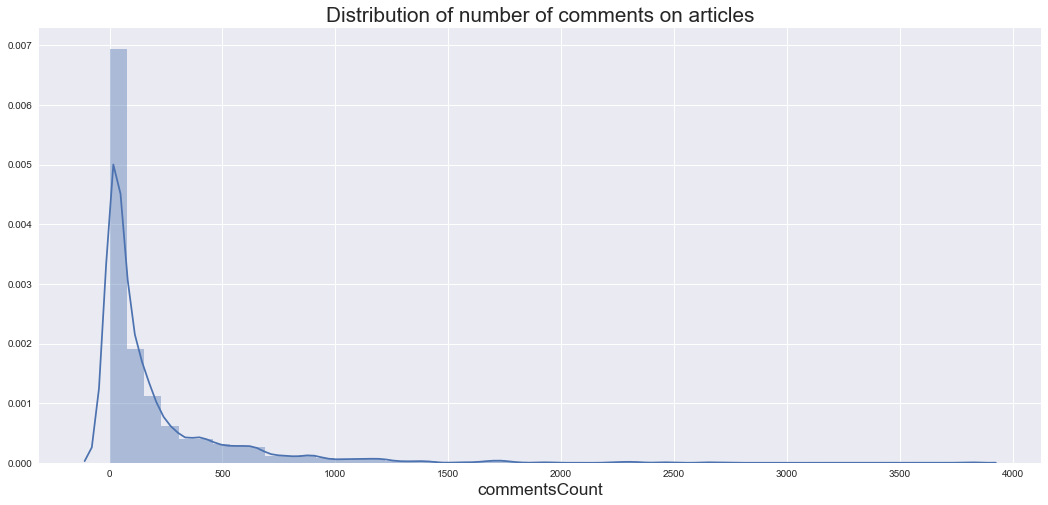

In [35]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.distplot(articles.commentsCount);
plt.title("Distribution of number of comments on articles");

In [36]:
print("Top 5 articles with the highest number of comments have the following count of comments: ")
print_largest_values(articles.commentsCount)
#The distribution of the word counts of the articles is more close to normal distribution with a some skewness to the right:

Top 5 articles with the highest number of comments have the following count of comments: 
3813
2659
2460
2328
2296



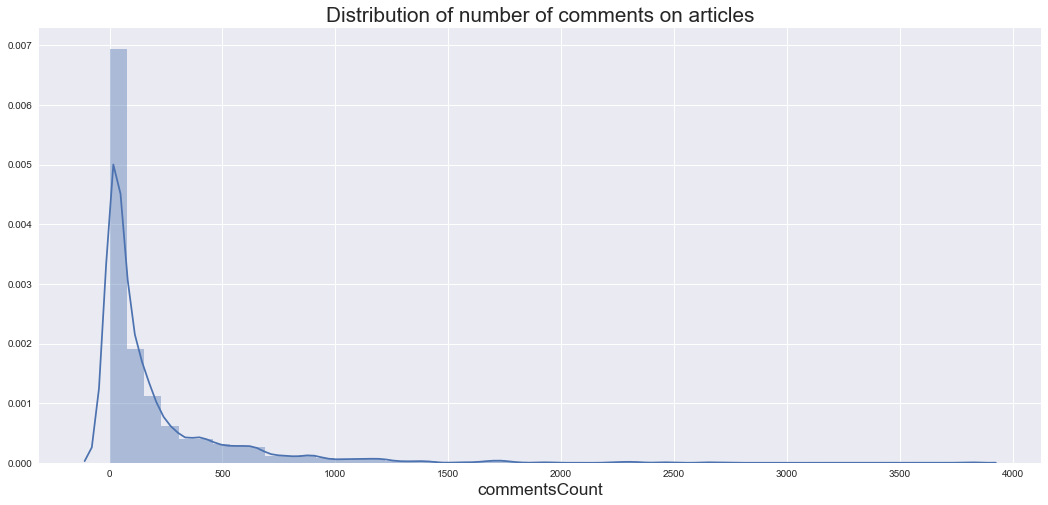

In [37]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.distplot(articles.commentsCount);
plt.title("Distribution of number of comments on articles");


In [38]:
print("Top 5 lengthiest articles contains the following number of words: ")
print_largest_values(articles.articleWordCount)
print("Top 5 shortest articles contains the following number of words: ")
print_smallest_values(articles.articleWordCount)
#The top 5 lengthiest articles contains the following number of words
#The distribution of the average number of upvotes on comments on the articles is far less skewed #
#as compared to the distribution of the number of upvotes on comments themselves.
#The skewness is smoothen out because the mean of the number upvotes on comments is considered.


Top 5 lengthiest articles contains the following number of words: 
9887
9417
8204
8039
7061

Top 5 shortest articles contains the following number of words: 
53
56
57
61
63



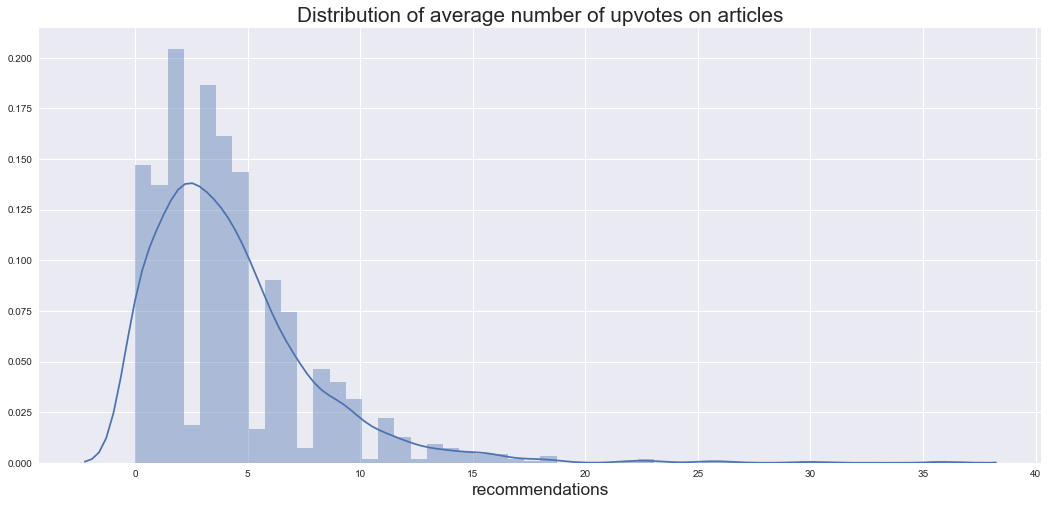

In [39]:
sns.distplot(articles.recommendations);
plt.title("Distribution of average number of upvotes on articles");

In [41]:
print("Top 5 articles in terms of the highest number of median upvotes on the comments have the following count of upvotes: ")
print_largest_values(articles.recommendations)
print("Top 5 articles in terms of the least number of median upvotes on the comments have the following count of upvotes: ")
print_smallest_values(articles.recommendations)
#Top 5 articles in terms of the highest number of median upvotes on the comments have the following count of upvotes: 
3

Top 5 articles in terms of the highest number of median upvotes on the comments have the following count of upvotes: 
36.0
30.0
26.0
25.5
23.0

Top 5 articles in terms of the least number of median upvotes on the comments have the following count of upvotes: 
0.0
0.5
1.0
1.5
2.0



3

In [42]:
#Every article on NYT that accepts comments displays a selected collection of comments, called NYT's (or Editor's) pick.

comments.editorsSelection.value_counts()


False    260809
True       4065
Name: editorsSelection, dtype: int64

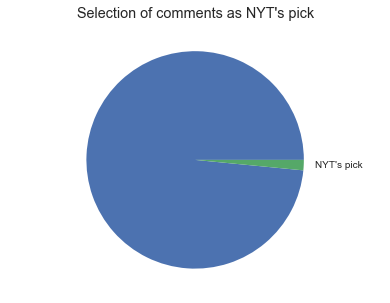

In [43]:
mpl.rcParams['figure.figsize'] = (6, 5)
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'medium'
plt.axis('equal')
plt.pie(comments.editorsSelection.value_counts(), labels=('', "NYT's pick"));
plt.title("Selection of comments as NYT's pick");
#The number of upvotes on the comments selected as Editor's pick are significantly higher 
#on average with a mean close to 230 upvotes:



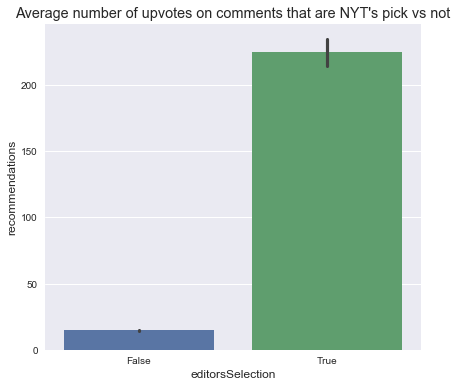

In [44]:
mpl.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x='editorsSelection', y='recommendations', data=comments);
plt.title("Average number of upvotes on comments that are NYT's pick vs not");
#Even though the comments that are selected as Editor's picks have more upvotes more on average, 
#the distribution of upvotes is still highly skewed to the right.

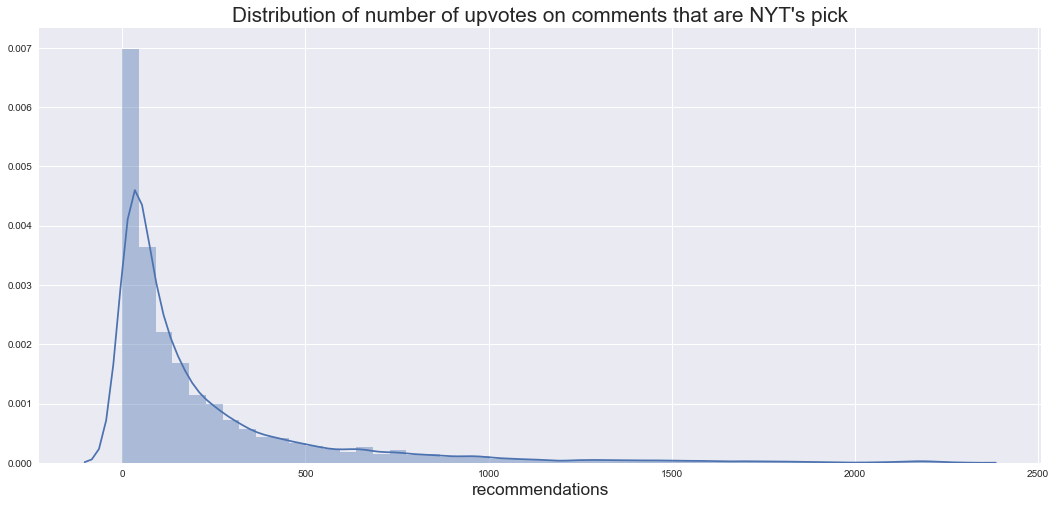

In [45]:
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(comments.loc[comments.editorsSelection==1, 'recommendations']);
plt.title("Distribution of number of upvotes on comments that are NYT's pick");
#his explains the not-so-high correlation coefficient between the two features - Editor's pick and the number of upvotes:

In [46]:
comments.editorsSelection.corr(comments.recommendations)

0.3436647317515239

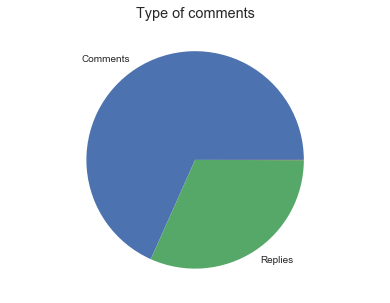

In [47]:
mpl.rcParams['figure.figsize'] = (6, 5)
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'medium'
plt.axis('equal')
plt.pie(comments.commentType.value_counts(), labels=('Comments', "Replies", "")); 
plt.title('Type of comments');


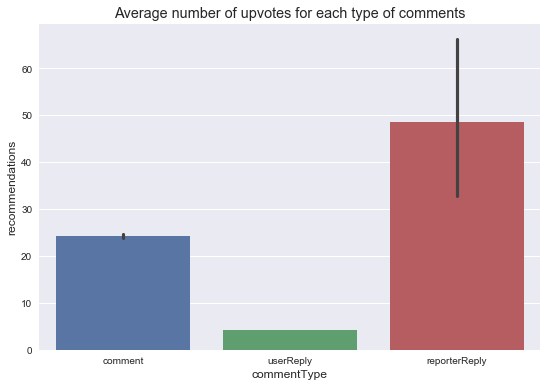

In [48]:
mpl.rcParams['figure.figsize'] = (8, 6)
sns.barplot(x='commentType', y='recommendations', data=comments);
plt.title("Average number of upvotes for each type of comments");

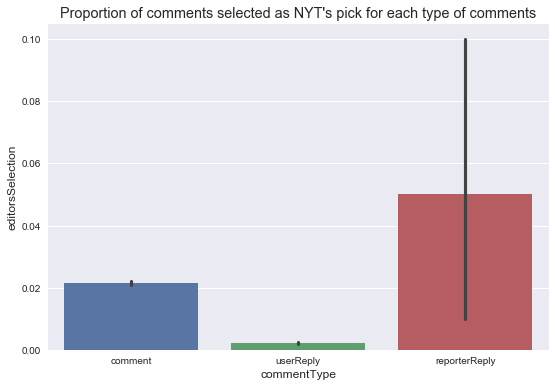

In [49]:
sns.barplot(x='commentType', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick for each type of comments");


In [50]:
comments.depth.value_counts()


1.0    180963
2.0     78280
3.0      5497
4.0       117
5.0        17
Name: depth, dtype: int64

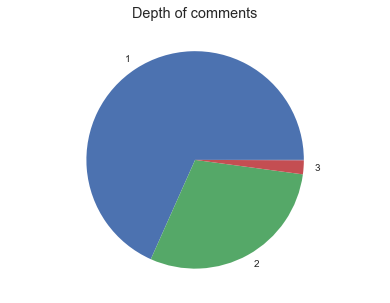

In [51]:
mpl.rcParams['figure.figsize'] = (6, 5)
plt.axis('equal')
plt.pie(comments.depth.value_counts(), labels=('1','2', '3', '', '')); 
plt.title('Depth of comments');

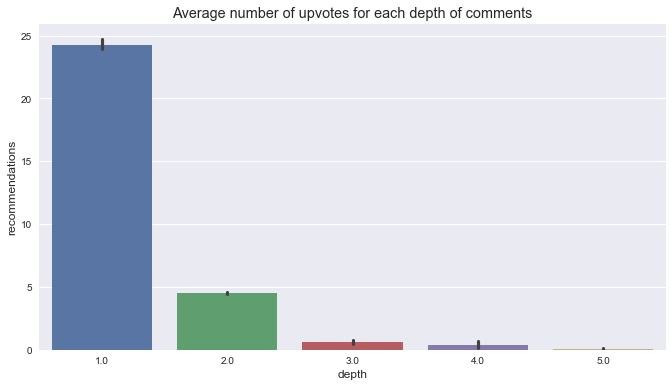

In [52]:
mpl.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x='depth', y='recommendations', data=comments);
plt.title("Average number of upvotes for each depth of comments");

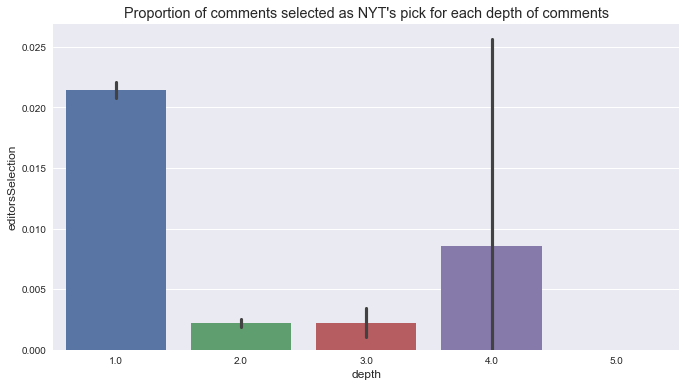

In [53]:
sns.barplot(x='depth', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick for each depth of comments");

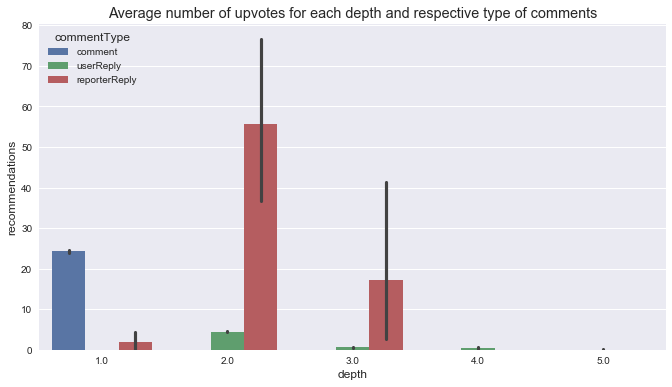

In [54]:
sns.barplot(x='depth', y='recommendations', hue='commentType', data=comments);
plt.title("Average number of upvotes for each depth and respective type of comments");

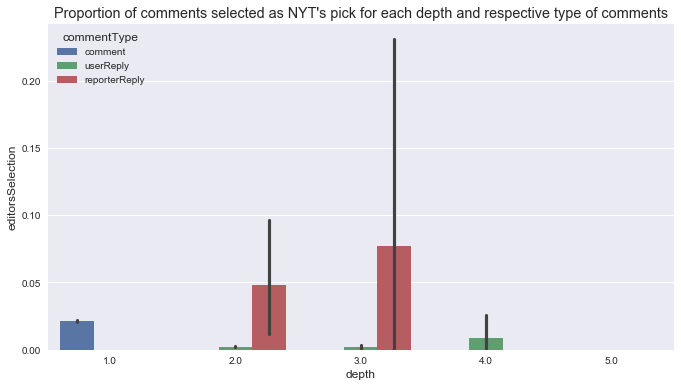

In [55]:
sns.barplot(x='depth', y='editorsSelection', hue='commentType', data=comments);
plt.title("Proportion of comments selected as NYT's pick for each depth and respective type of comments");

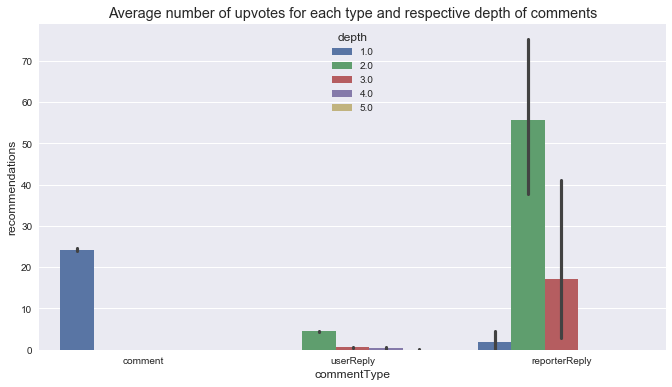

In [56]:
sns.barplot(x='commentType', y='recommendations', hue='depth', data=comments);
plt.title("Average number of upvotes for each type and respective depth of comments");

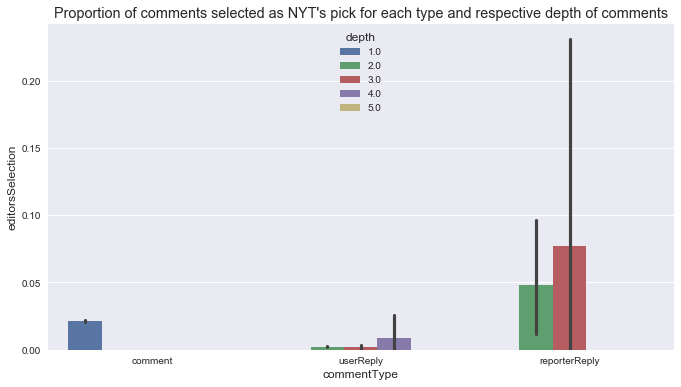

In [57]:
sns.barplot(x='commentType', y='editorsSelection', hue='depth', data=comments);
plt.title("Proportion of comments selected as NYT's pick for each type and respective depth of comments");

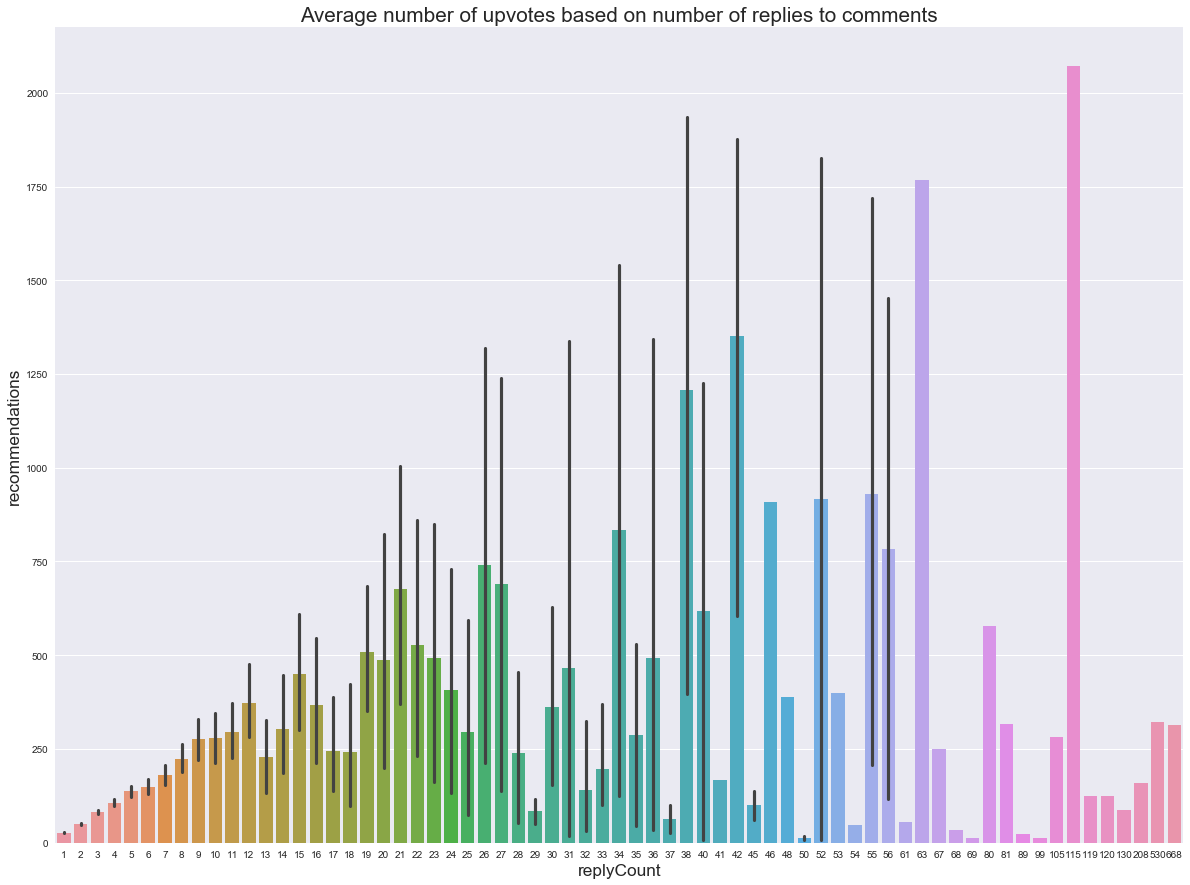

In [58]:
mpl.rcParams['figure.figsize'] = (18, 15)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.barplot(x='replyCount', y='recommendations', data=comments[comments.replyCount>0]);
plt.title("Average number of upvotes based on number of replies to comments");

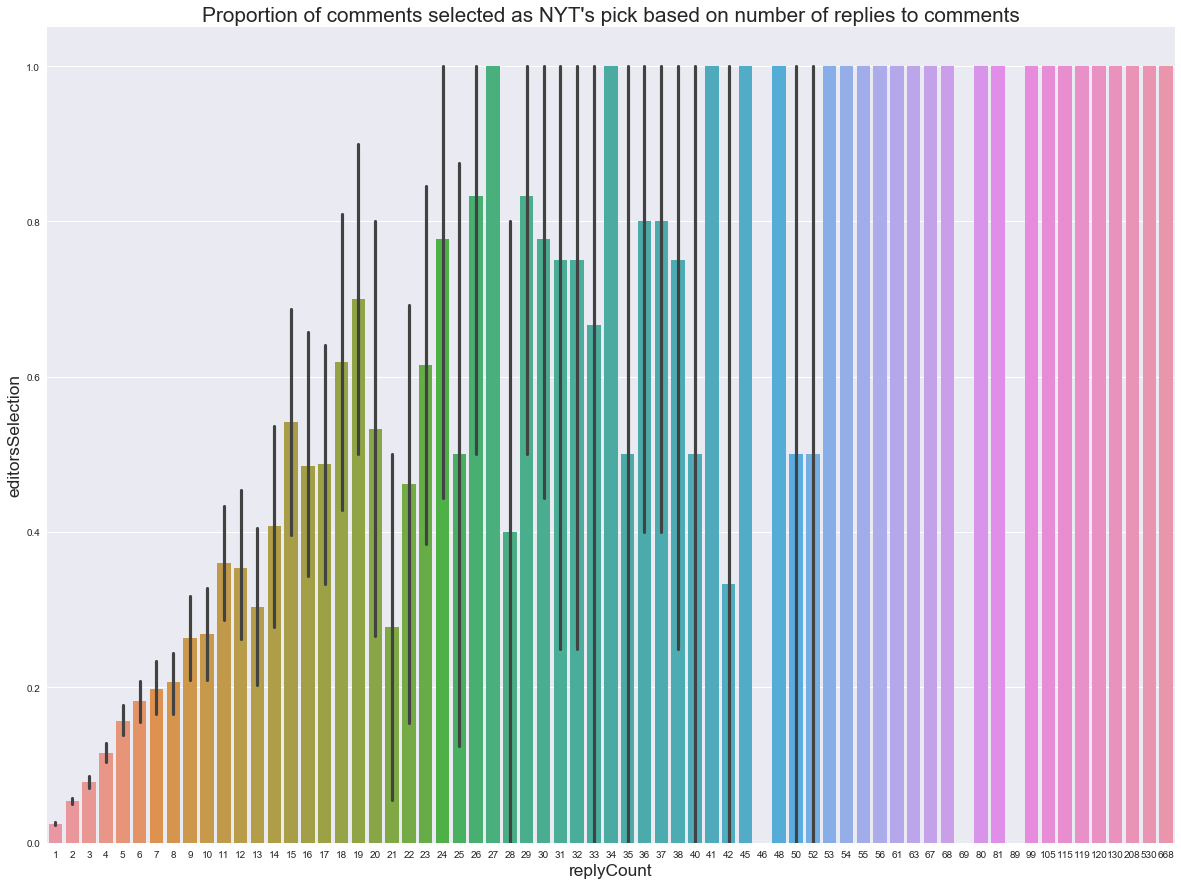

In [59]:
sns.barplot(x='replyCount', y='editorsSelection', data=comments[comments.replyCount>0]);
plt.title("Proportion of comments selected as NYT's pick based on number of replies to comments");


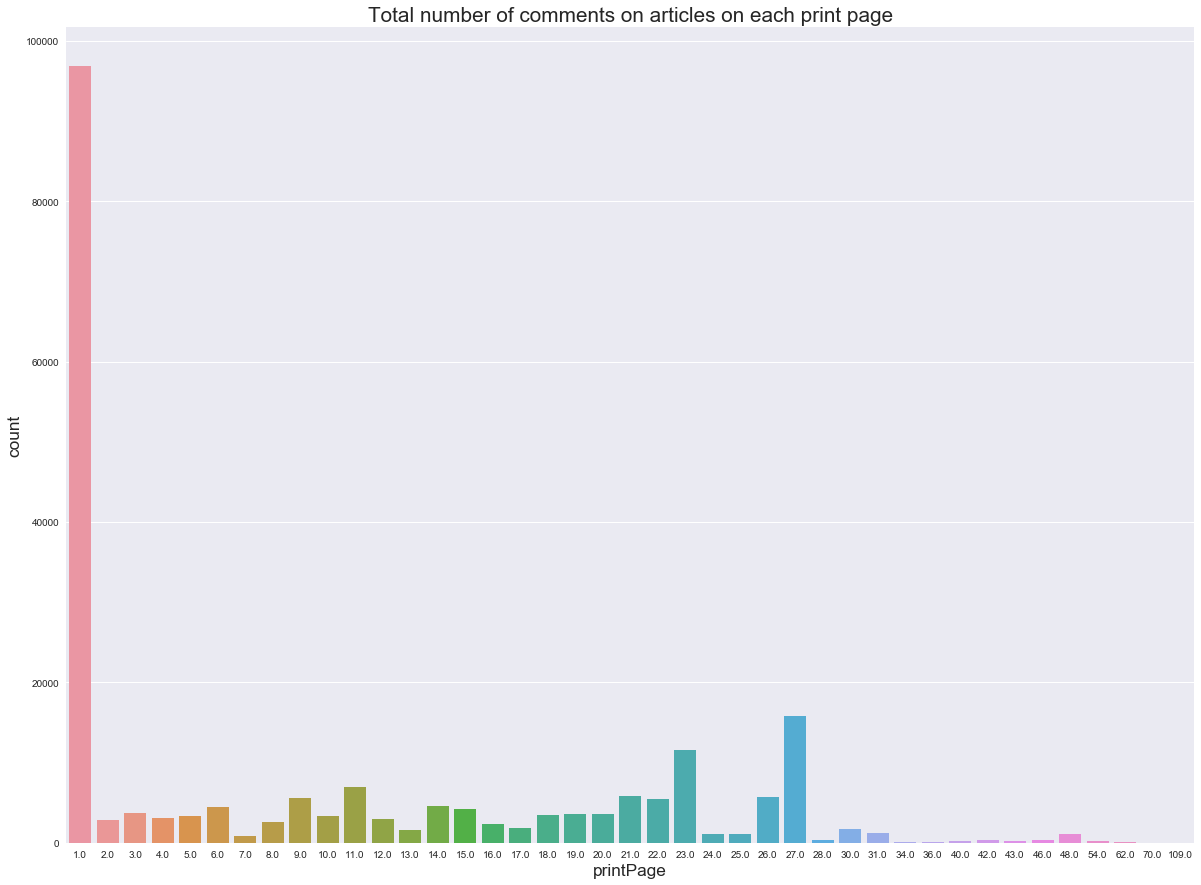

In [60]:
sns.countplot(x="printPage", data=comments[comments.printPage>0]);
plt.title("Total number of comments on articles on each print page");
#The number of comments of Page 1 may be higher because 
#more articles from Page 1 were open to comments as shown in the graph below:

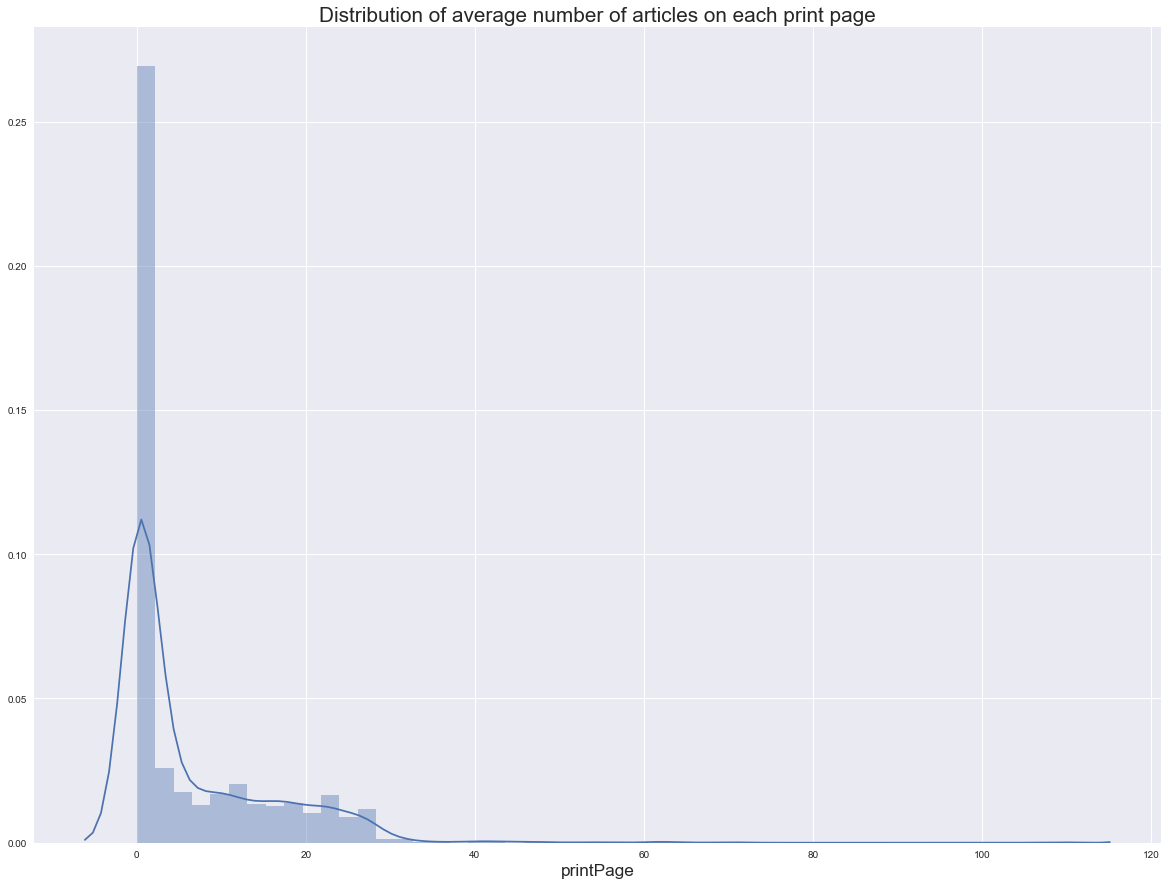

In [61]:
sns.distplot(articles.printPage);
plt.title("Distribution of average number of articles on each print page");
#Despite the highly skewed distribution of the number of upvotes on comments from articles on various pages,
#the average number of upvotes received is more uniform:

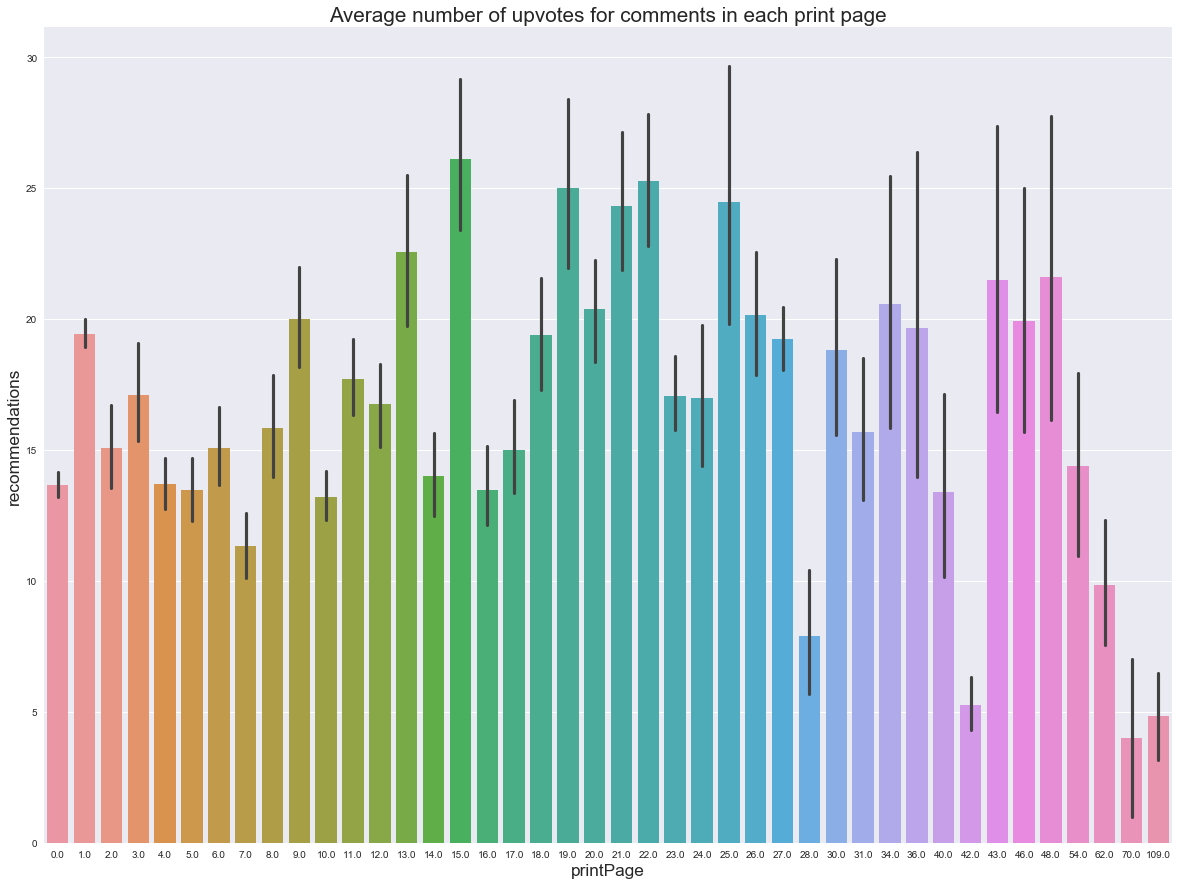

In [62]:
sns.barplot(x='printPage', y='recommendations', data=comments);
plt.title("Average number of upvotes for comments in each print page");

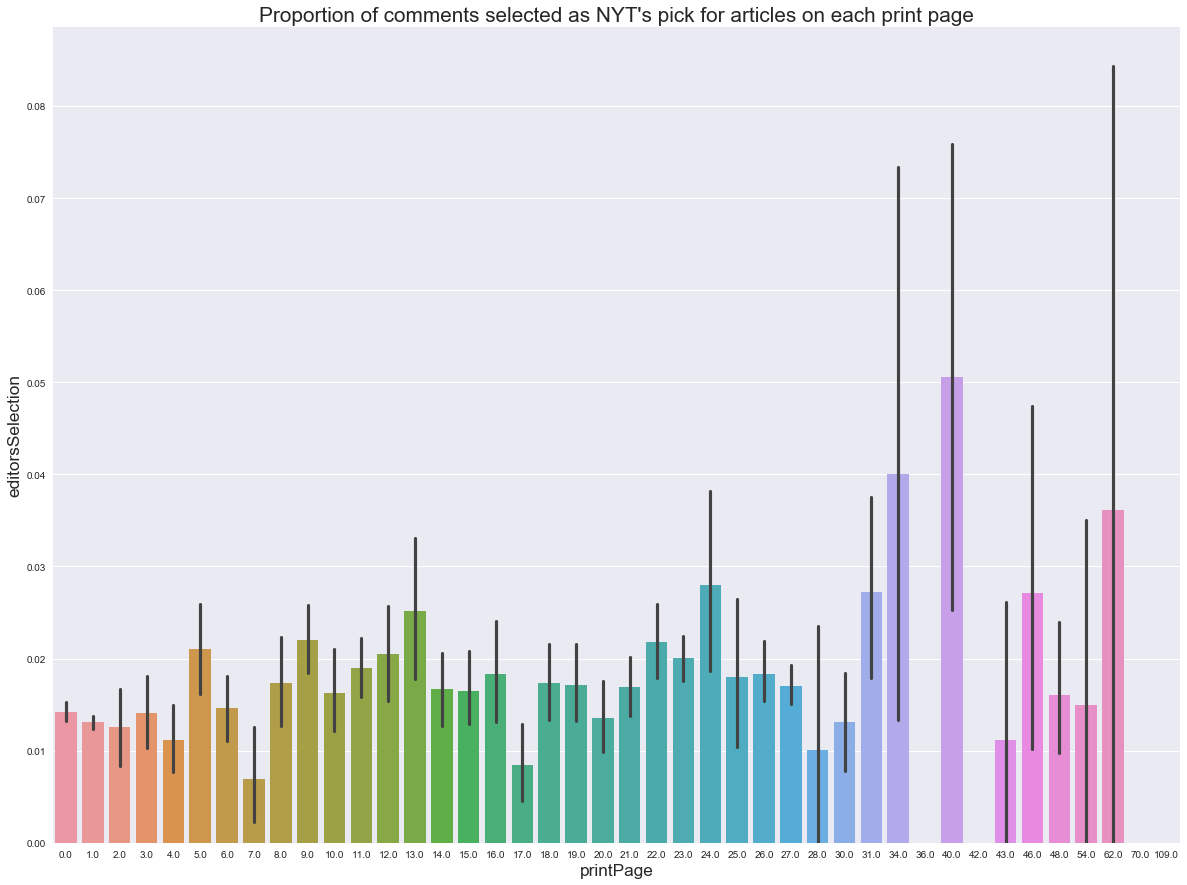

In [63]:
sns.barplot(x='printPage', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick for articles on each print page");


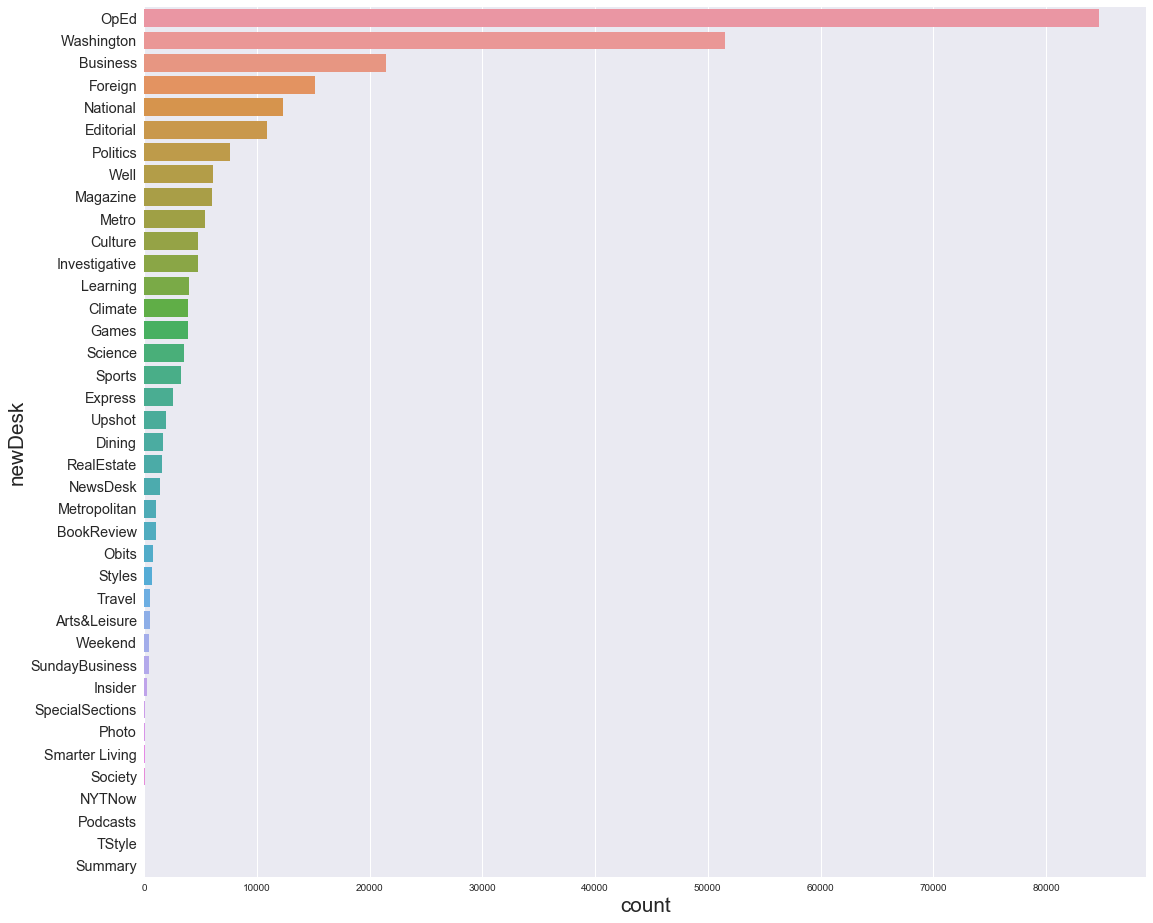

In [64]:
mpl.rcParams['figure.figsize'] = (16, 16)
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'large'
sns.countplot(y="newDesk", data=comments, order=comments.newDesk.value_counts().index);

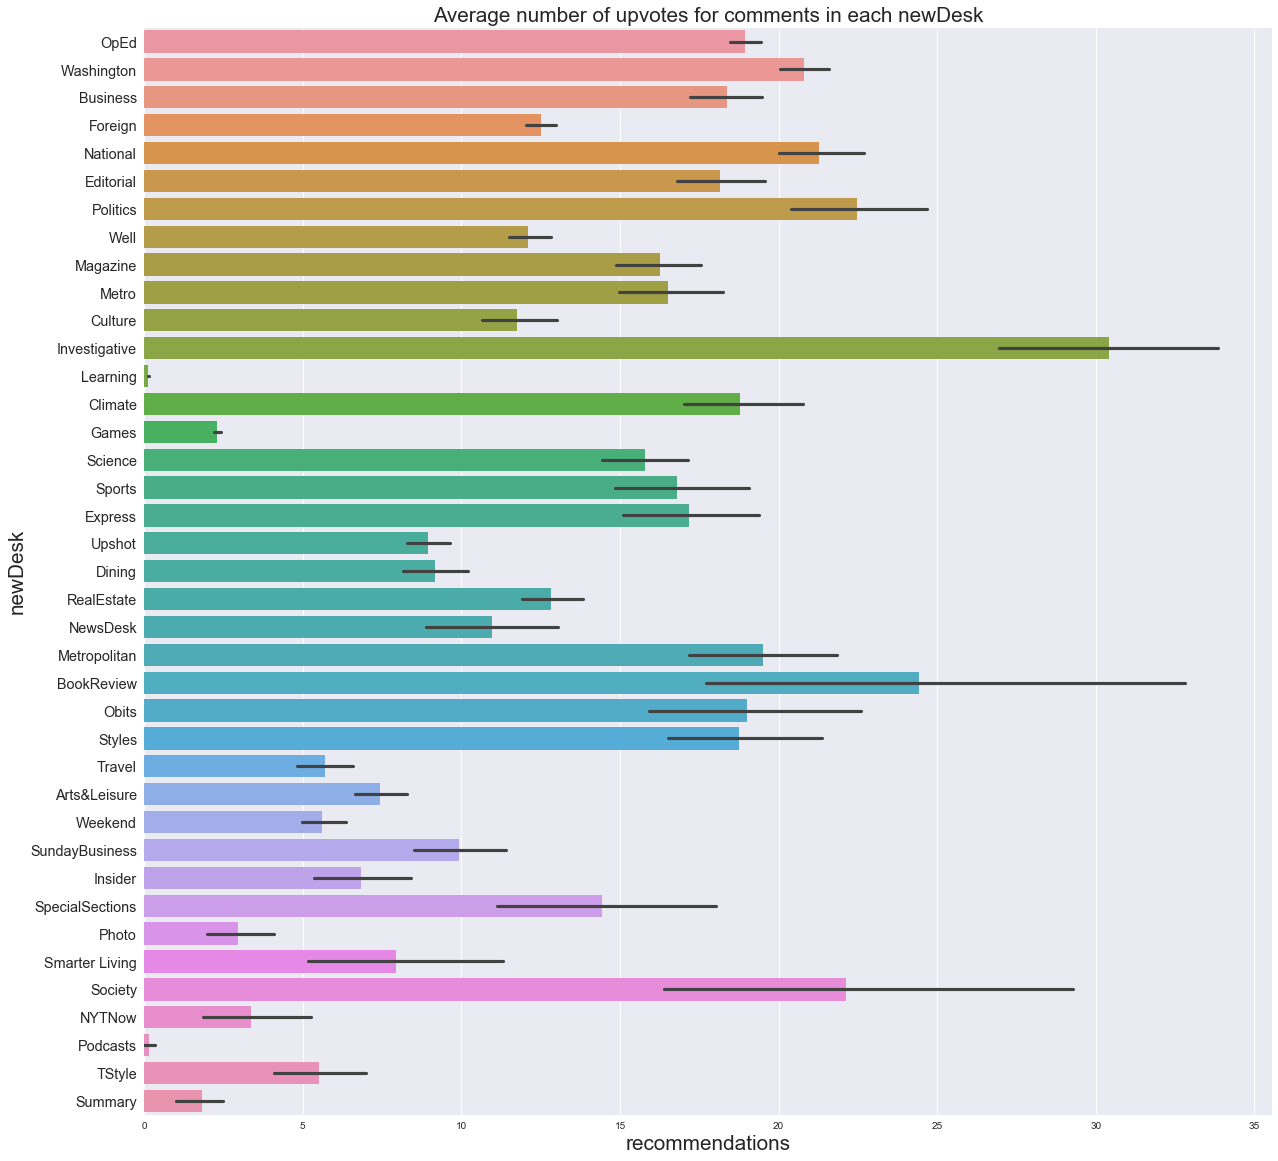

In [65]:
mpl.rcParams['figure.figsize'] = (18, 20)
sns.barplot(y='newDesk', x='recommendations', data=comments, order=comments.newDesk.value_counts().index);
plt.title("Average number of upvotes for comments in each newDesk");

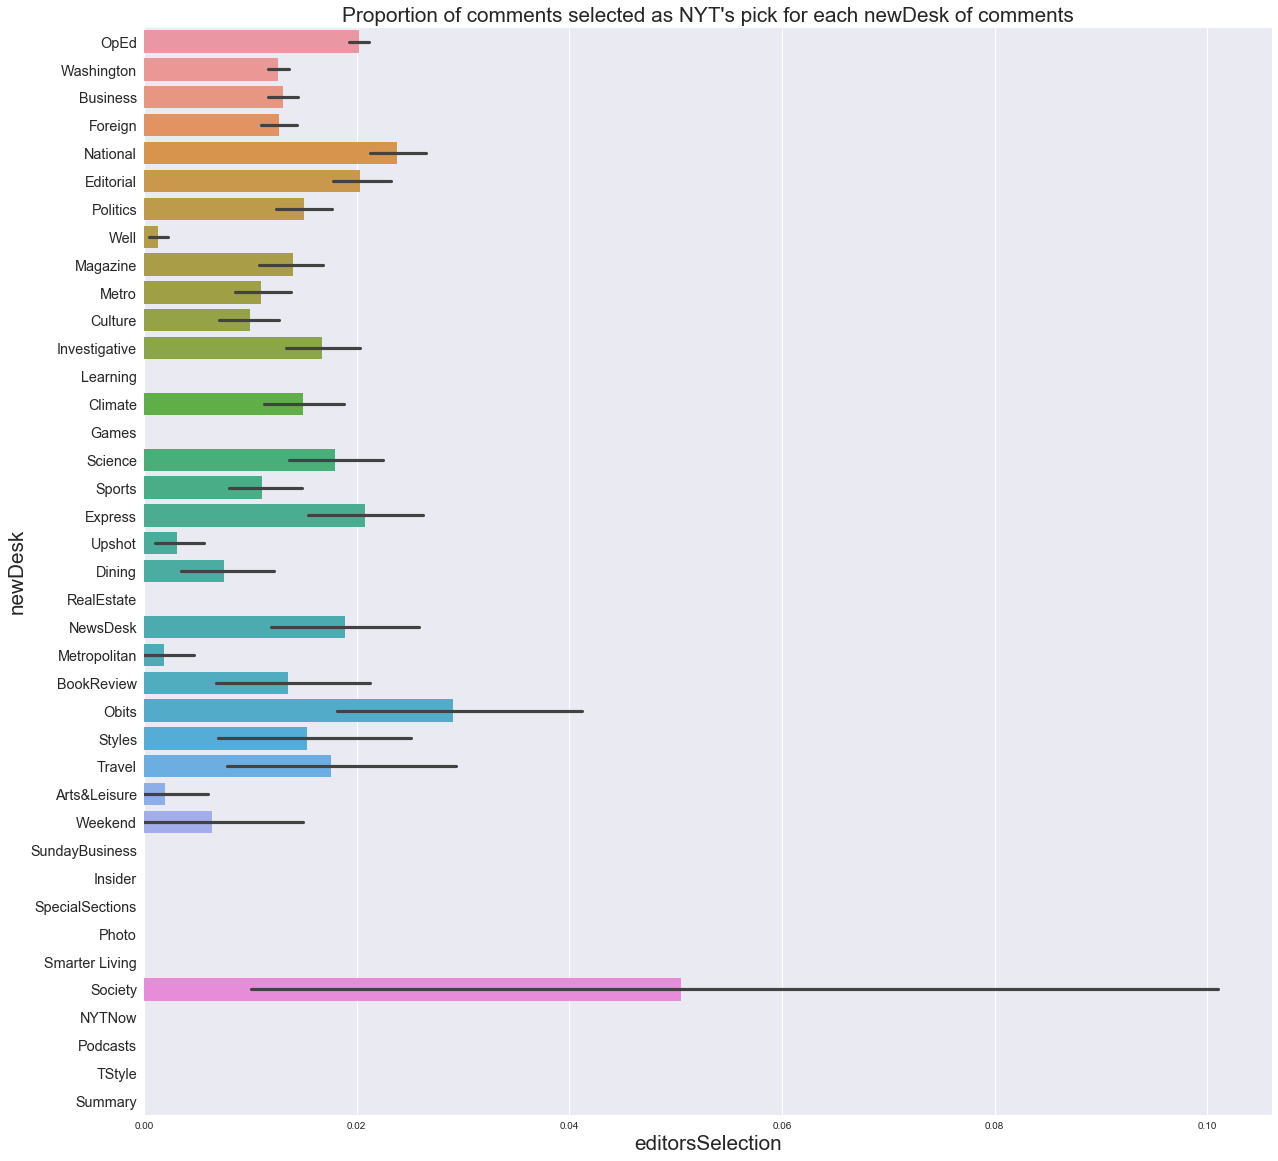

In [66]:
sns.barplot(y='newDesk', x='editorsSelection', data=comments, order=comments.newDesk.value_counts().index);
plt.title("Proportion of comments selected as NYT's pick for each newDesk of comments");


In [67]:
top_desk = set(comments.newDesk.value_counts()[:4].index)
top_desk

{'Business', 'Foreign', 'OpEd', 'Washington'}

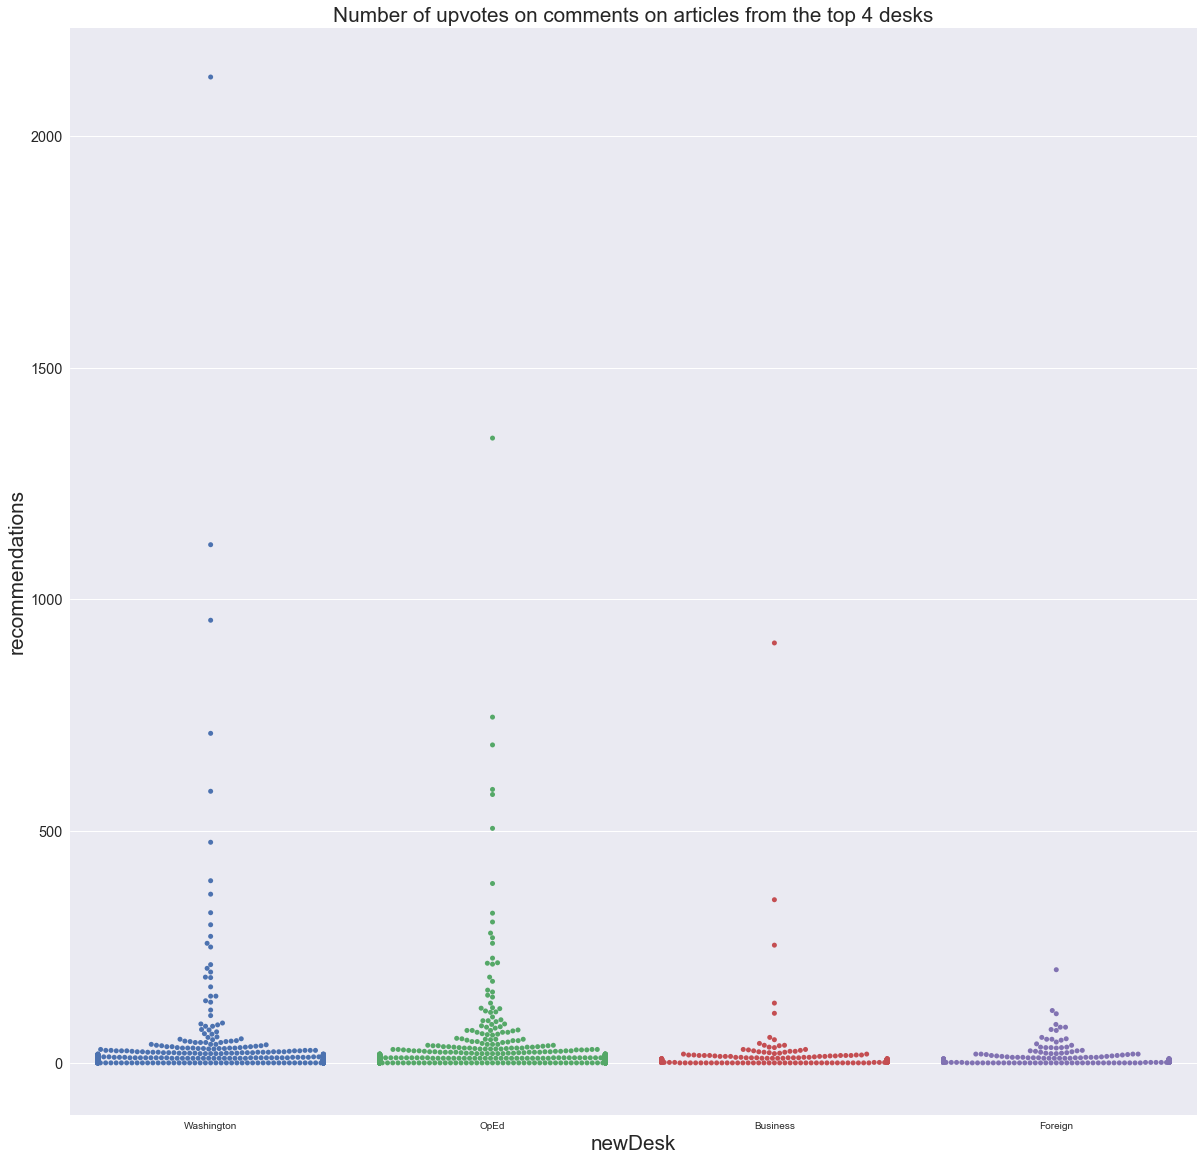

In [68]:
sample_frequent_newDesk = comments.loc[comments.newDesk.isin(top_desk),
                                 ['newDesk', 'recommendations']].sample(2000)

sample_frequent_newDesk.newDesk = sample_frequent_newDesk.newDesk.astype('object')
sns.swarmplot(x='newDesk', y='recommendations', data=sample_frequent_newDesk);
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'medium'
plt.title("Number of upvotes on comments on articles from the top 4 desks");


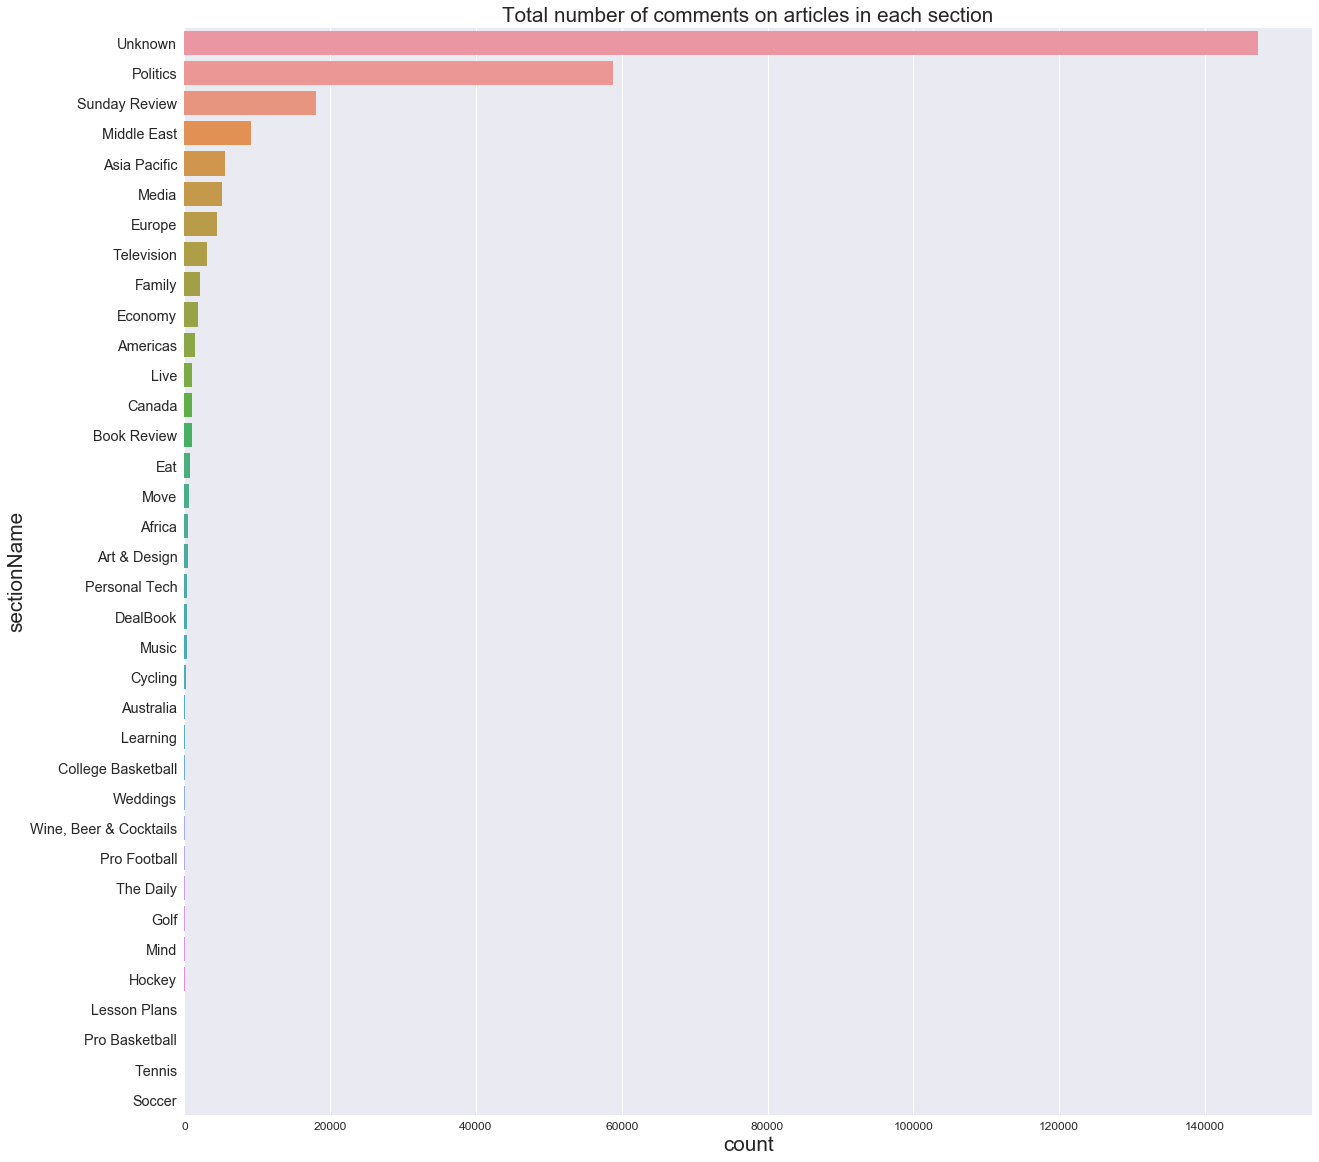

In [69]:
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'large'
sns.countplot(y="sectionName", data=comments, order=comments.sectionName.value_counts().index);
plt.title("Total number of comments on articles in each section");

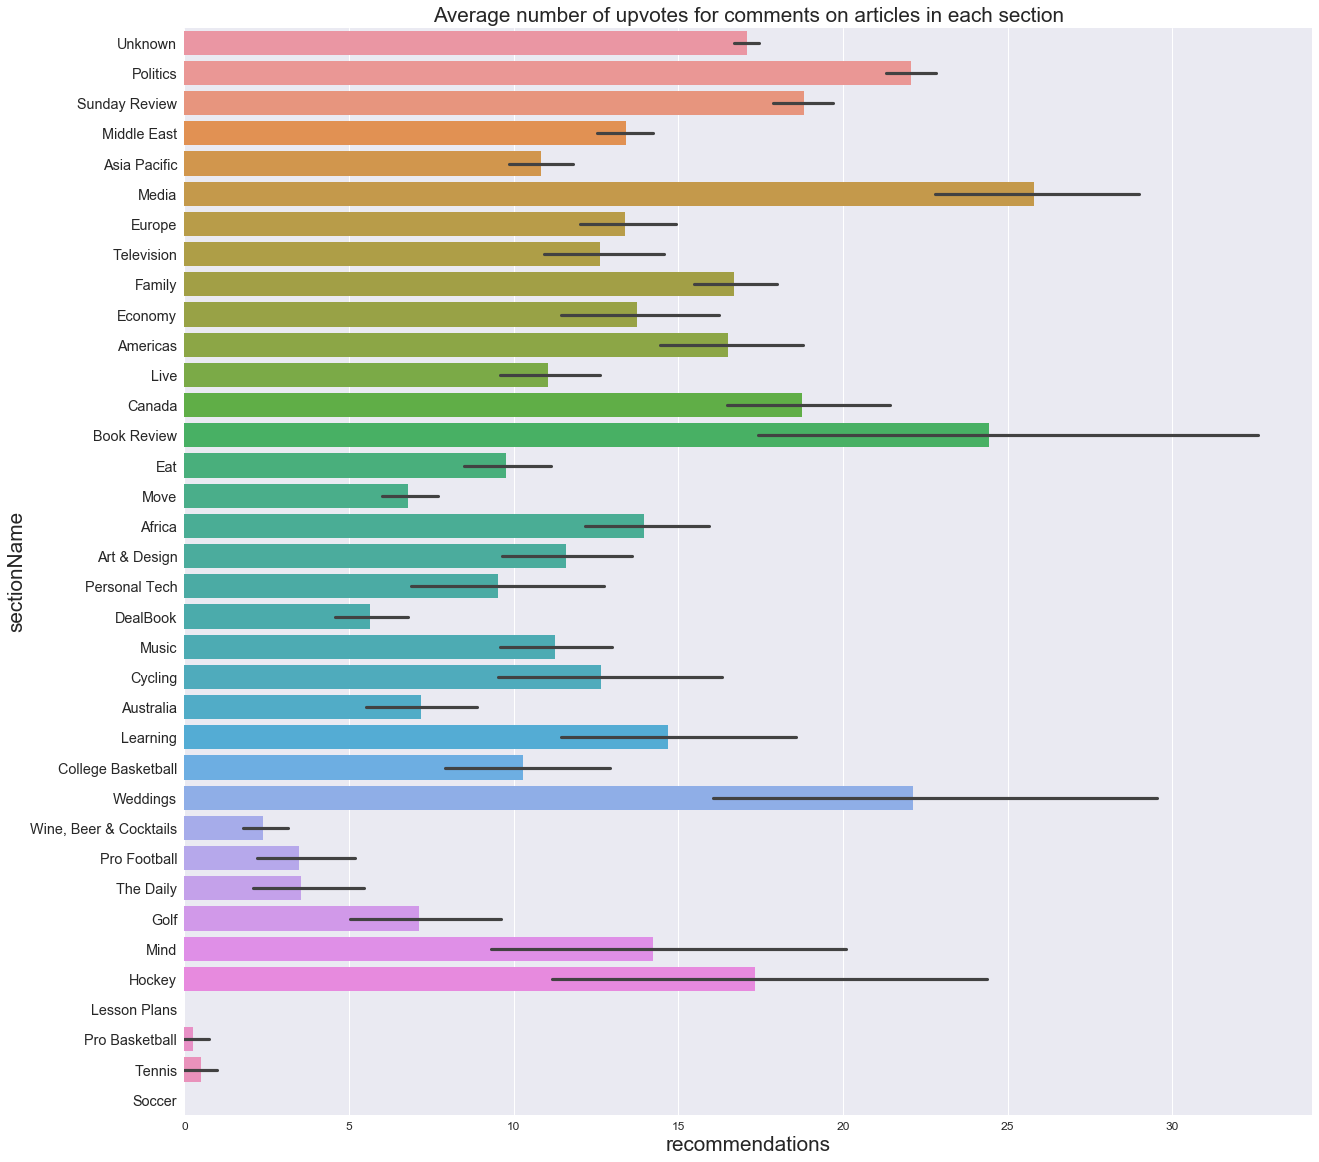

In [70]:
sns.barplot(y='sectionName', x='recommendations', data=comments, order=comments.sectionName.value_counts().index);
plt.title("Average number of upvotes for comments on articles in each section");


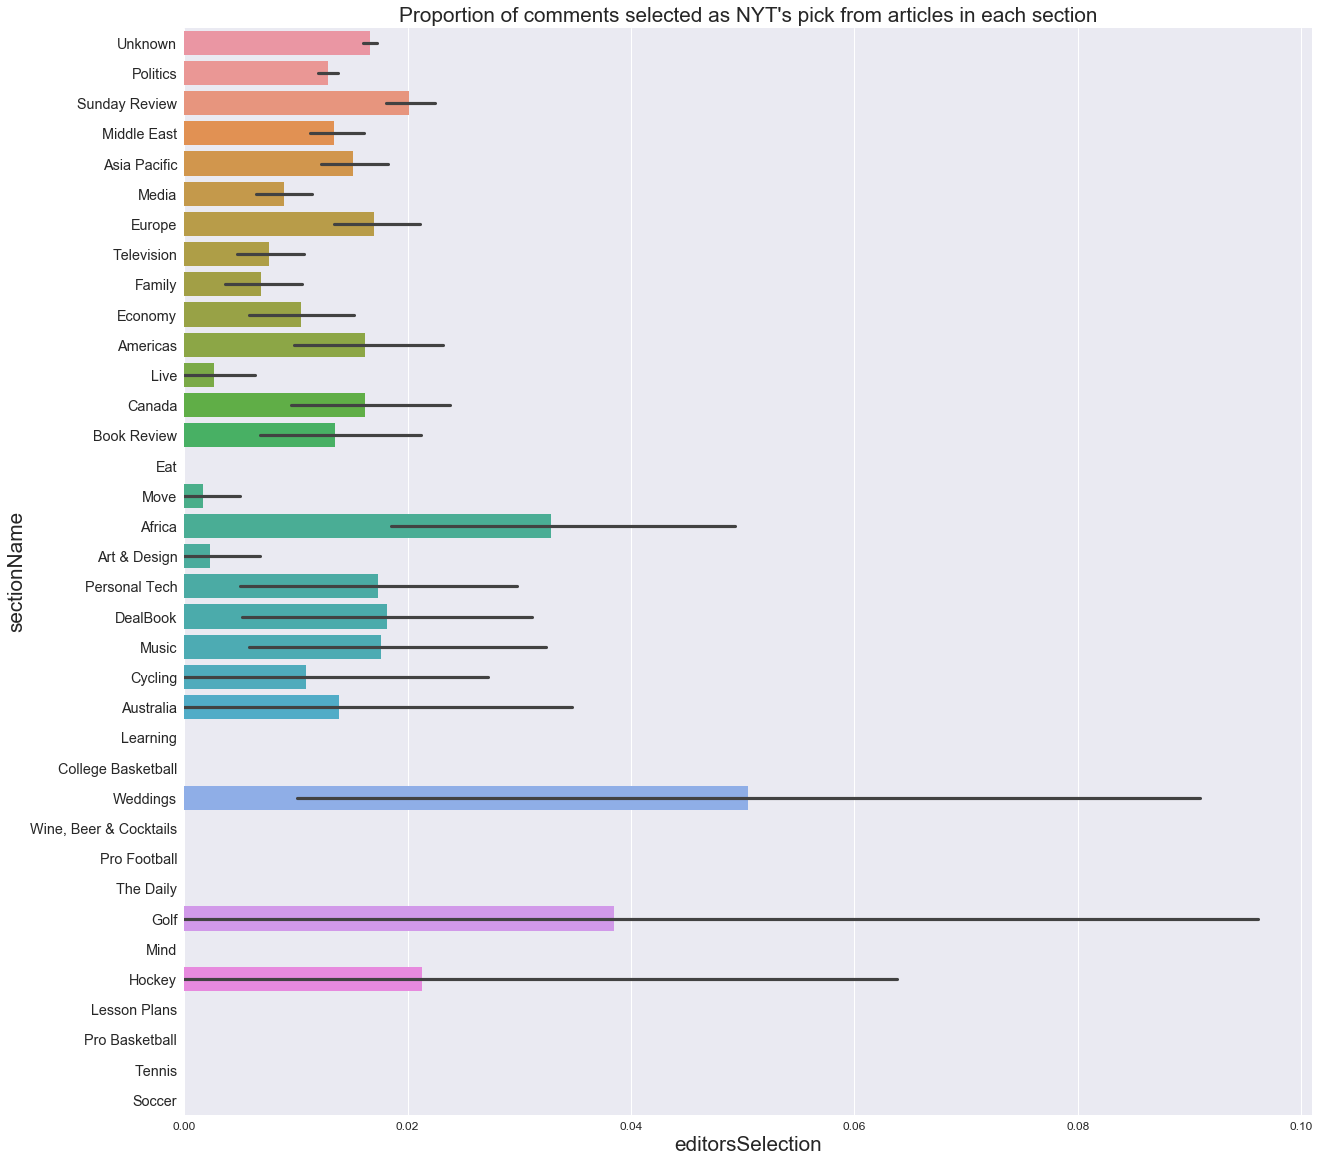

In [71]:
sns.barplot(y='sectionName', x='editorsSelection', data=comments, order=comments.sectionName.value_counts().index);
plt.title("Proportion of comments selected as NYT's pick from articles in each section");

In [72]:
sorted_articles = articles[['articleWordCount', 'editorsSelection', 'recommendations']].sort_values(by='articleWordCount')

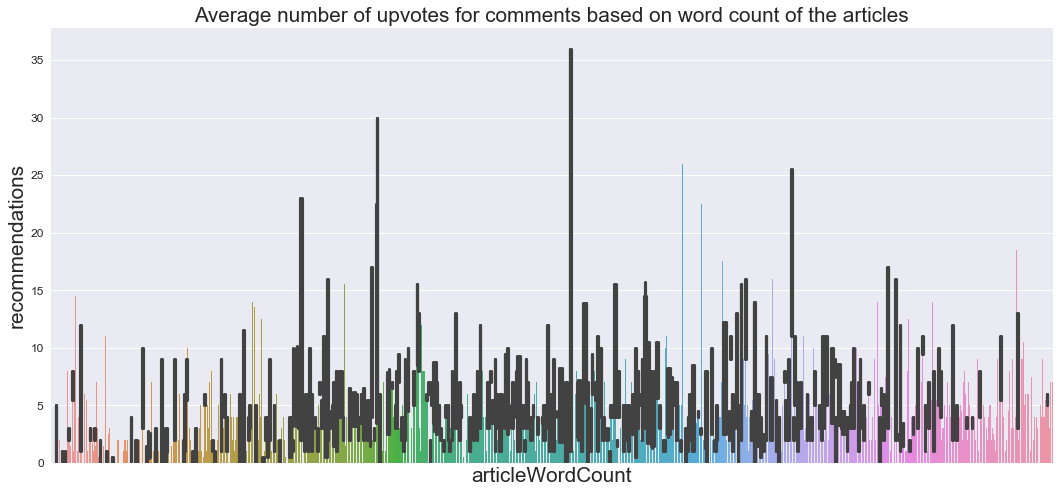

In [73]:
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['ytick.labelsize'] = 'medium'
sns.barplot(x='articleWordCount', y='recommendations', data=sorted_articles, order=sorted_articles.articleWordCount);
plt.xticks([]);
plt.title("Average number of upvotes for comments based on word count of the articles");

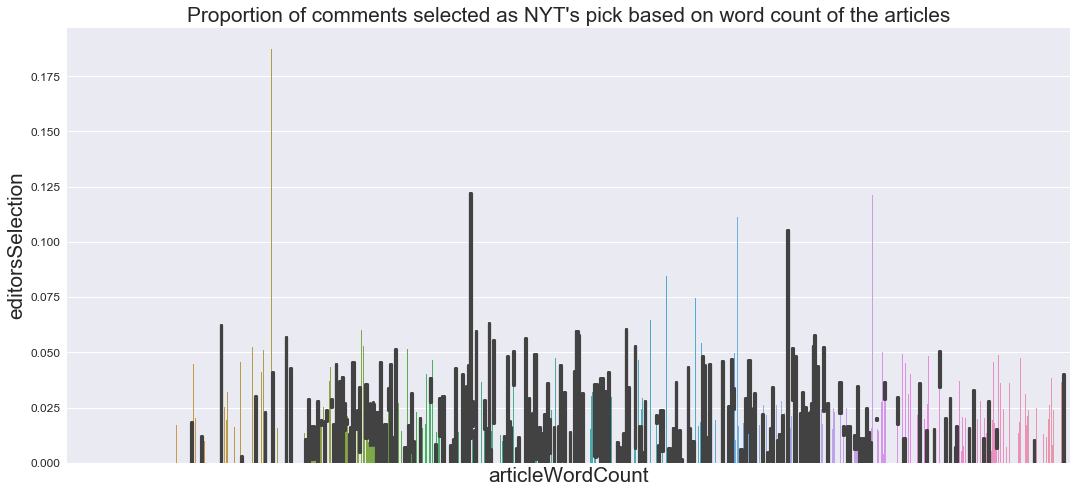

In [74]:
sns.barplot(x='articleWordCount', y='editorsSelection', data=sorted_articles, order=sorted_articles.articleWordCount);
plt.xticks([]);
plt.title("Proportion of comments selected as NYT's pick based on word count of the articles");

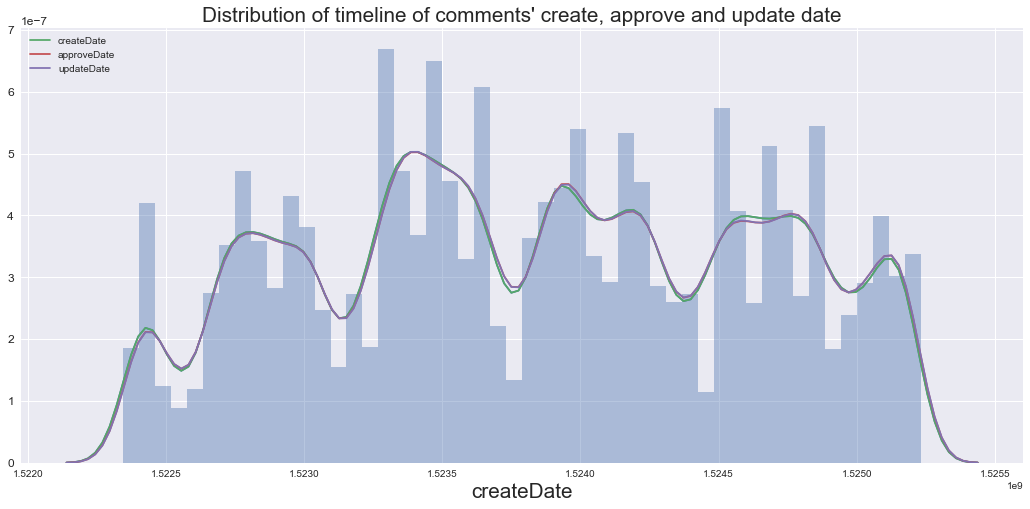

In [75]:
fig, ax = plt.subplots()
sns.distplot(comments.createDate, ax=ax);
sns.kdeplot(comments.createDate, ax=ax);
sns.kdeplot(comments.approveDate, ax=ax);
sns.kdeplot(comments.updateDate, ax=ax);
plt.title("Distribution of timeline of comments' create, approve and update date");
ax.legend(loc='upper left');

In [76]:
comments.sharing.value_counts()

0    243502
1     21372
Name: sharing, dtype: int64

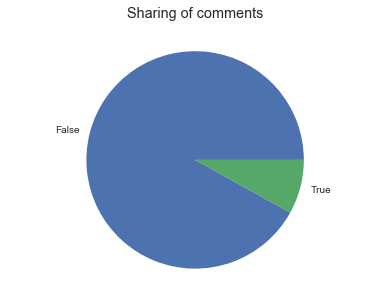

In [77]:
mpl.rcParams['figure.figsize'] = (6, 5)
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'medium'
plt.axis('equal')
plt.pie(comments.sharing.value_counts(), labels=('False', "True"));
plt.title("Sharing of comments");

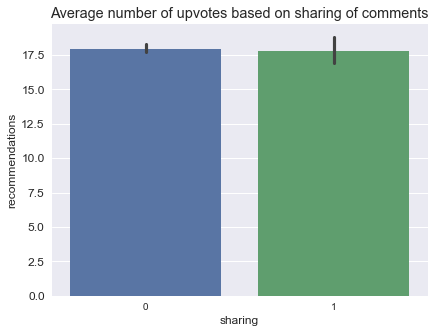

In [78]:
sns.barplot(x='sharing', y='recommendations', data=comments);
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
plt.title("Average number of upvotes based on sharing of comments");

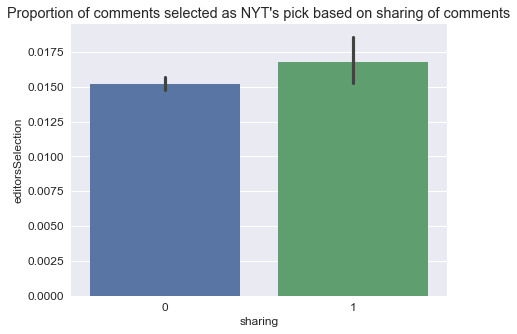

In [79]:
sns.barplot(x='sharing', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick based on sharing of comments");

In [80]:
comments.trusted.value_counts()

0    256081
1      8793
Name: trusted, dtype: int64

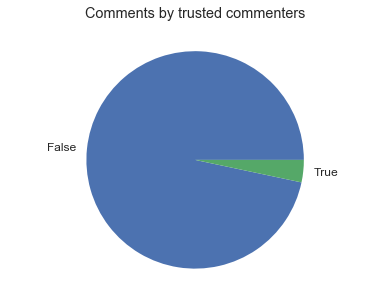

In [81]:
mpl.rcParams['figure.figsize'] = (6, 5)
plt.axis('equal')
plt.pie(comments.trusted.value_counts(), labels=('False', "True"));
plt.title("Comments by trusted commenters");

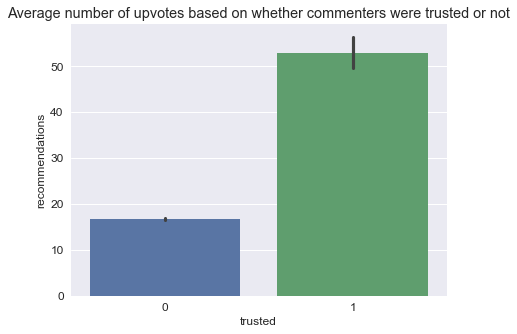

In [82]:
sns.barplot(x='trusted', y='recommendations', data=comments);
plt.title("Average number of upvotes based on whether commenters were trusted or not");

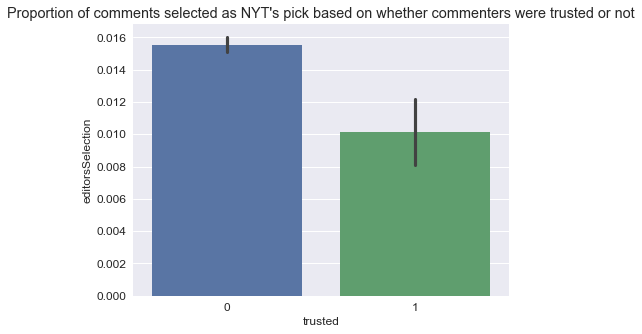

In [83]:
sns.barplot(x='trusted', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick based on whether commenters were trusted or not");

In [84]:
comments.timespeople.value_counts()

1    242838
0     22036
Name: timespeople, dtype: int64

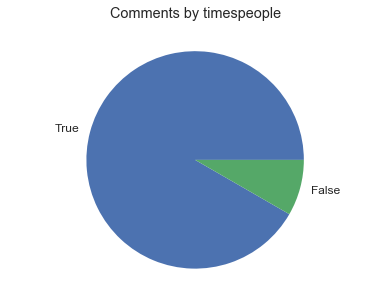

In [85]:
mpl.rcParams['figure.figsize'] = (6, 5)
plt.axis('equal')
plt.pie(comments.timespeople.value_counts(), labels=("True", 'False'));
plt.title("Comments by timespeople");

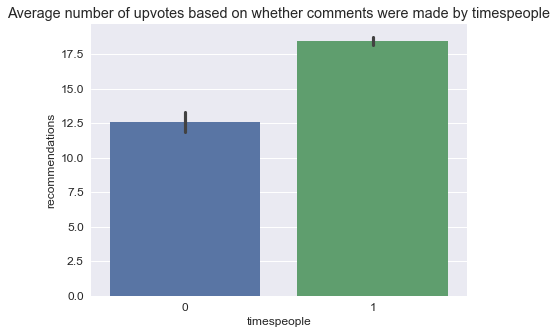

In [86]:
sns.barplot(x='timespeople', y='recommendations', data=comments);
plt.title("Average number of upvotes based on whether comments were made by timespeople");

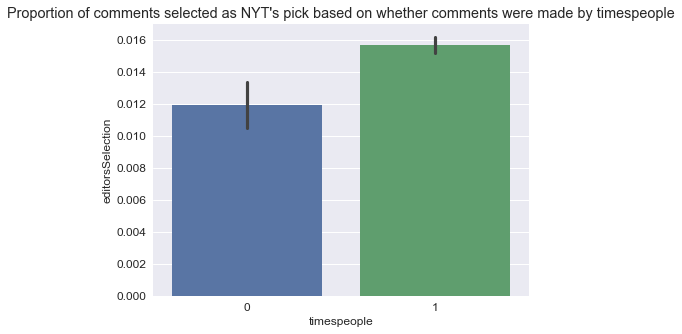

In [87]:
sns.barplot(x='timespeople', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick based on whether comments were made by timespeople");

In [88]:
def custom_pic_feature(df):
    url1 = 'https://graphics8.nytimes.com/images/apps/timespeople/none.png'
    url2 = 'http://graphics8.nytimes.com/images/apps/timespeople/none.png'
    df['customPic'] = np.where((df.picURL == url1) | (df.picURL == url2), 0, 1)
    df.customPic = df.customPic.astype('category').cat.codes
    return df

comments = custom_pic_feature(comments)

In [89]:
comments.customPic.value_counts()

0    224841
1     40033
Name: customPic, dtype: int64

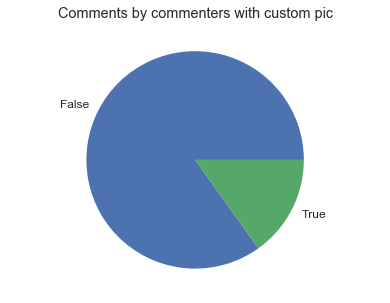

In [90]:
mpl.rcParams['figure.figsize'] = (6, 5)
plt.axis('equal')
plt.pie(comments.customPic.value_counts(), labels=('False', "True"));
plt.title("Comments by commenters with custom pic");

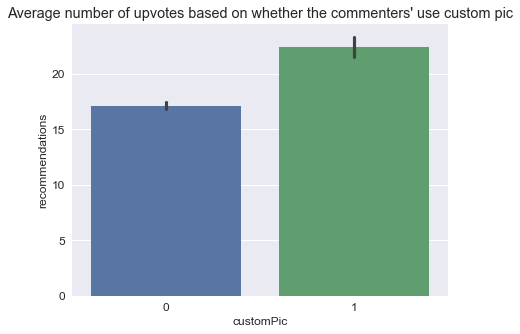

In [91]:
sns.barplot(x='customPic', y='recommendations', data=comments);
plt.title("Average number of upvotes based on whether the commenters' use custom pic");

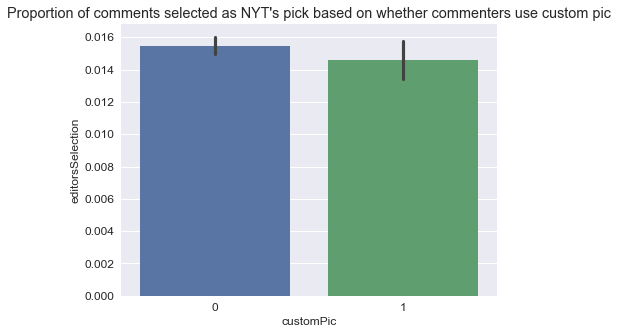

In [92]:
sns.barplot(x='customPic', y='editorsSelection', data=comments);
plt.title("Proportion of comments selected as NYT's pick based on whether commenters use custom pic");


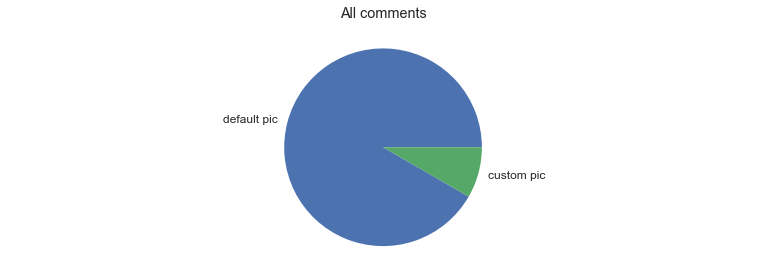

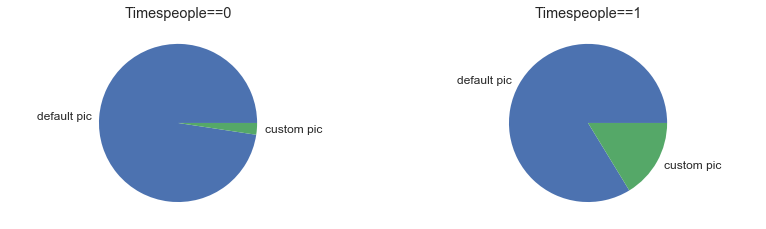

In [93]:
plt.figure(figsize=(12, 10))
ax = plt.subplot(211)
ax.axis('equal')
ax.pie(comments.timespeople.value_counts(), labels=('default pic', 'custom pic'));
ax.set_title('All comments')

plt.figure(figsize=(12, 8))
ax1 = plt.subplot(223)
ax1.axis('equal')
ax1.pie(comments.loc[comments.timespeople==0, 'customPic'].value_counts(), labels=('default pic', 'custom pic'));
ax1.set_title('Timespeople==0')

ax2 = plt.subplot(224)
ax2.axis('equal')
ax2.pie(comments.loc[comments.timespeople==1, 'customPic'].value_counts(), labels=('default pic', 'custom pic'));
ax2.set_title('Timespeople==1')

plt.show()

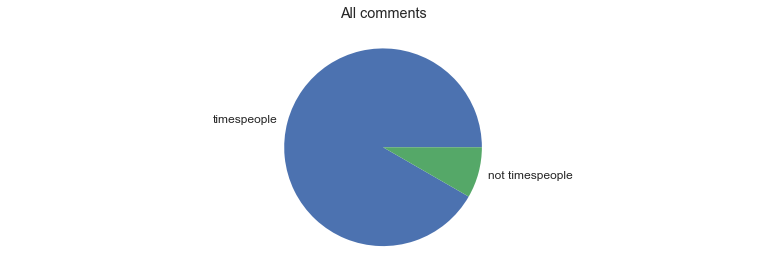

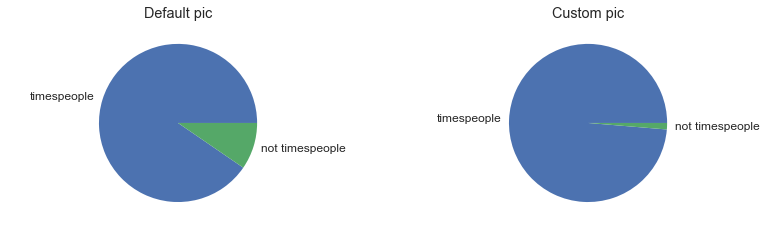

In [94]:
plt.figure(figsize=(12, 10))
ax = plt.subplot(211)
ax.axis('equal')
ax.pie(comments.timespeople.value_counts(), labels=('timespeople', 'not timespeople'));
ax.set_title('All comments')

plt.figure(figsize=(12, 8))
ax1 = plt.subplot(223)
ax1.axis('equal')
ax1.pie(comments.loc[comments.customPic==0, 'timespeople'].value_counts(), labels=('timespeople', 'not timespeople'));
ax1.set_title('Default pic')

ax2 = plt.subplot(224)
ax2.axis('equal')
ax2.pie(comments.loc[comments.customPic==1, 'timespeople'].value_counts(), labels=('timespeople', 'not timespeople'));
ax2.set_title('Custom pic')

plt.show()

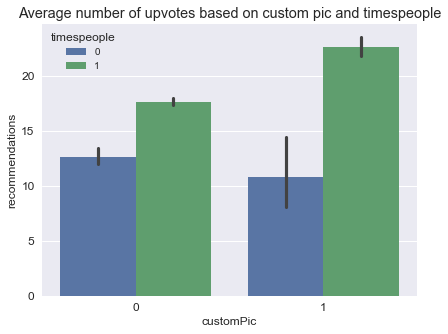

In [95]:
sns.barplot(x='customPic', y='recommendations', hue='timespeople', data=comments);
plt.title("Average number of upvotes based on custom pic and timespeople");

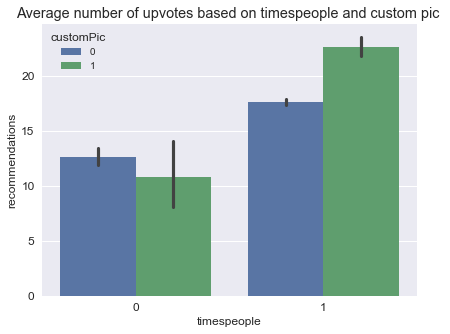

In [96]:
sns.barplot(x='timespeople', y='recommendations', hue='customPic', data=comments);
plt.title("Average number of upvotes based on timespeople and custom pic ");

In [98]:
comments.userTitle.fillna('Unknown', inplace=True)
comments.userTitle.value_counts()

Unknown                                  264774
editor, Wordplay                             33
Columnist                                    30
Reporter                                      7
New Old Age columnist                         6
Editorial Director, Reader Center             6
Staff editor and author of this piece         6
Economics correspondent                       2
Climate Change Reporter                       2
senior staff editor                           2
Editorial board writer                        2
Senior staff editor                           1
Columnist, New York Today                     1
Staff Editor, The Learning Network            1
Science reporter                              1
Name: userTitle, dtype: int64

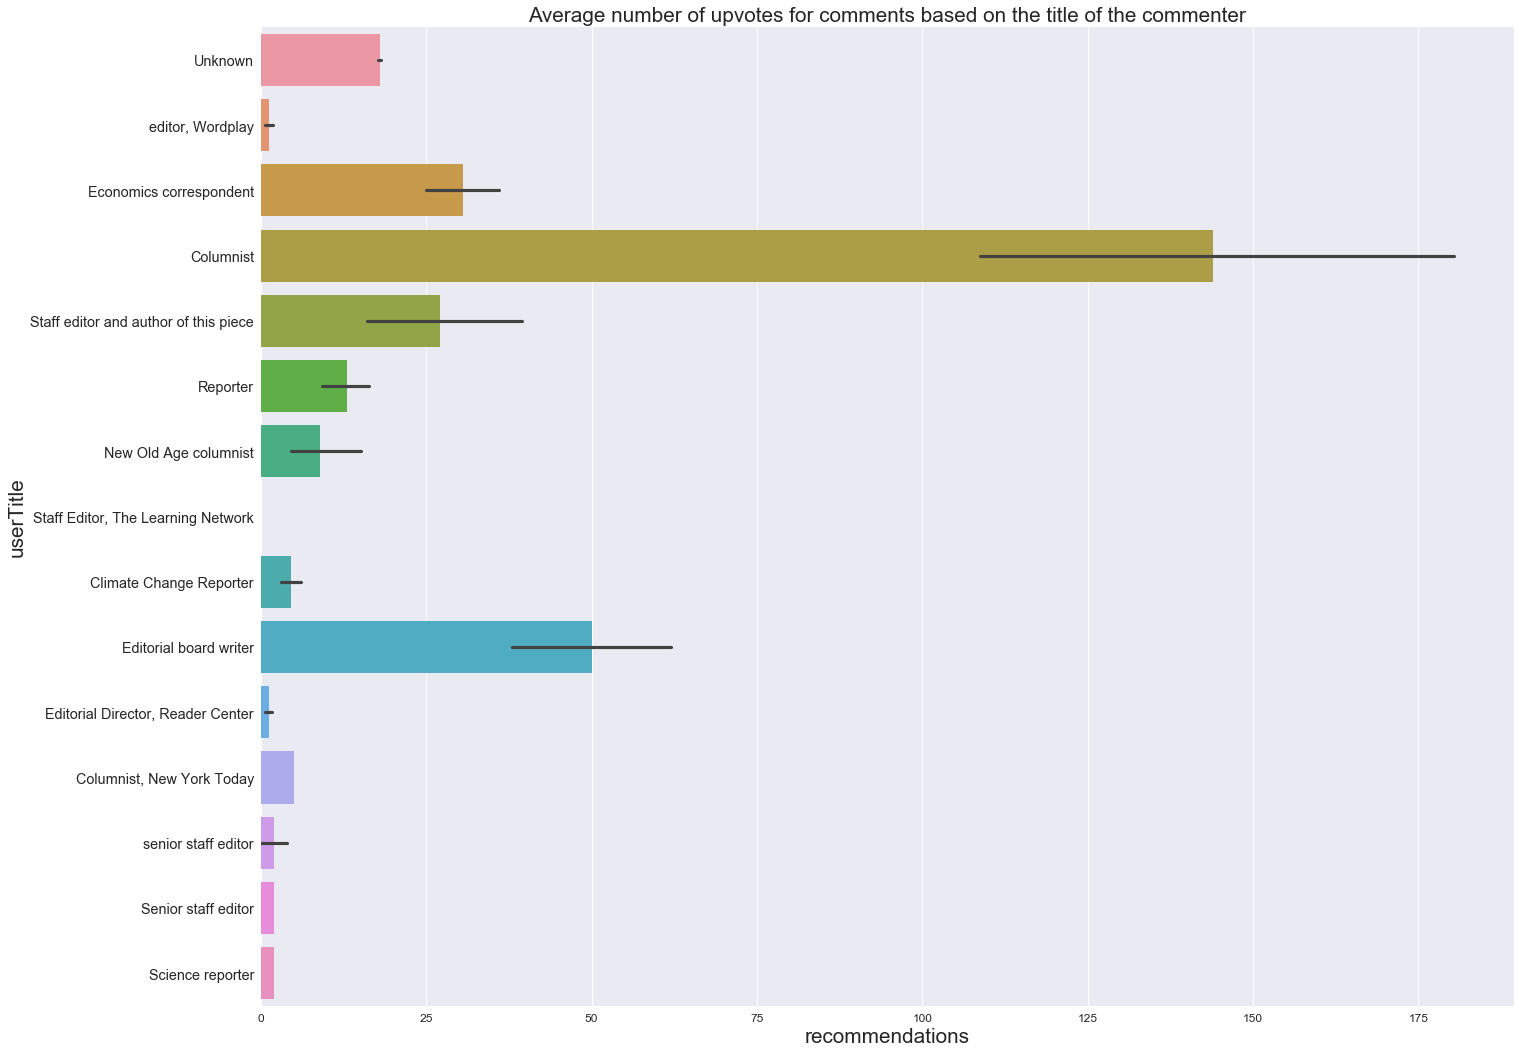

In [99]:
mpl.rcParams['figure.figsize'] = (20, 18)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'large'
sns.barplot(x='recommendations', y="userTitle", data=comments);
plt.title("Average number of upvotes for comments based on the title of the commenter");